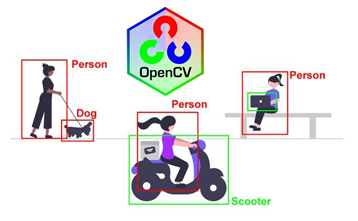

#[**OpenCV :  Nivel Intermedio**](https://www.youtube.com/playlist?list=PLBg7GSvtrU2MOLWM0bGU1_FT3LsJPyY-5)

#[**Contando Objetos con Umbralización Simple**](https://www.youtube.com/watch?v=wBPIAGNTFzY&list=PLBg7GSvtrU2MOLWM0bGU1_FT3LsJPyY-5&index=16)

Ahora se desarrolla un código **Python** para contar objetos con **OpenCV**.<br/>

Se lee una imagen, esta por default en OpenCV va a estar en BGR.<br/>

Luego se le aplica una transformación a escala de grises.<br/>

Como se requiere que los objetos de nuestro interés estén en color blanco y el fondo de color negro se le aplica un **thresholding** o **Umbralización Simple**, de este modo se obtiene una clara diferenciación del objeto en relación al fondo. Vale recordar que esta técnica solamente se podrá realizar cuando los objetos se pueden despegar claramente del fondo, lo que se conoce como una imagen binarizada.<br/>

Una vez que se tiene la imagen binarizada se aplica el método para obtener los contornos de las figuras en blanco y así poder contarlas.<br/>

Finalmente se dibuja dichos contornos y se los cuenta con OpenCV.<br/>

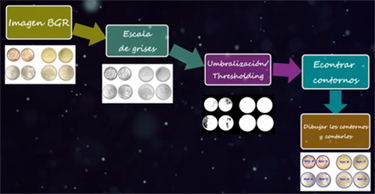


Los métodos de **OpenCV** a emplear son:<br/>

- (1) **Leer y visualizar una imagen** con: `cv2.imread()` y `cv2.imshow()`
con el nombre del archivo como argumento.

- (2) **Transformación en escala de grises**: `cv2.cvtColor()`
y se le da dos argumentos,el nombre de la imagen y el método preestablecido por **OpenCV** para transformación a escala de grises como argumento, este es `cv2.COLOR_BGR2GRAY`.

- (3) Proceso de **umbralización / thesholding**: `cv2.threshold()`
 con cuatro argumentos, la variable de la escala de grises, el valor del umbral del pixel, valor del pixel que sobrexcedan al umbral, y finalmente el método preestablecido por **OpenCV** para umbralización, en este caso `cv2.THRESH_BINARY_INV` que es la binarización invertida para que el fondo sea negro (si se quisiera una umbralización normal se utiliza el método `cv2.THRESH_BINARY_INV` como cuarto argumento). Este método threshold completo se alojará en vos variables, una anónima protegida y una segunda que comúnmente se llama *th*.

- (4) **Marcar los contornos**: `cv2.findContours()`
 , una vez que ya se tiene la umbralización realizada con los objetos en color blanco, se va a poder encontrar y dibujar los contornos de cada objeto con el método antes mensionado. Como argumentos se le pasa la variable de la umbralización,  luego un método `cv2.RETR_EXTERNAL` como segundo argumento que detecta solamente los contornos externos de los objetos, y como último argumento el método de aproximacion del contorno `cv2.CHAIN_APROX_SIMPLE`. A todo esto se aloja en tres variables, un anonima protegida, una segunda que llamamos cnts y una última variable anónima protegida.

- (5) **Dibujar los contornos**: `cv2.drawContours()`
 , para que cada objeto tenga su contorno dibujado. A este método le da cinco argumentos, primero la imagen en donde se van a visualizar los contornos, seguidos de la variable con todos los contornos, como tercer argumento -1 que significa que se dibujen todos los contornos (sino es una iteración por cada contorno), como cuarto argumento el color en valores de BGR para que se vean los contornos en este color y por último el valor del grosor de dicho contorno.   

- (6) Imprimir el **conteo de los objetos**: se usa la función `print()`
, con `len()` para contar los contornos.


- (7) **Analizar y contar de a uno los objetos**: ciclo for
, aquí se debe modificar la función `cv2.drawContours()` en el segundo y tercer argumento, en el segundo argumento se va a digitar a cada contorno seguido del texto, en tanto que en el tercer argumento ya no se incluye a todos los contornos.

Hasta aquí cada vez que se presiona una tecla se dibujarán cada uno de los contornos o sea objeto encontrado.

- (8) **Conteo de objeto**: ciclo for
, ahora por cada contorno se va a obtener su punto central, y además en estas coordenadas se visualiza el conteo de cada objeto con `cv2.putText()`.





  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#Conteo de objetos

import cv2

imagen16 = cv2.imread('Monedas.jpg')
grises = cv2.cvtColor(imagen16, cv2.COLOR_BGR2GRAY)

_, th = cv2.threshold(grises, 240, 255, cv2.THRESH_BINARY_INV)

_,cnts,_ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

'''
#Este bloque es para una visualizacion completa de todos los contornos

cv2.drawContours(imagen16, cnts, -1, (255,0,0), 3)
print("Contornos: ", len(cnts))

cv2.imshow("Imagen: ", imagen16)
cv2.imshow("Th", th)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

'''
#Este bloque es para visualizar uno x uno los contornos de objetos cada vez que se presiona una tecla
#Atencion: este bloque reemplaza al anterior

for c in cnts:
  cv2.drawContours(imagen, [c], 0, (255,0,0), 3)
  cv2.imshow('Imagen (-,-)', imagen16)
  cv2.waitKey(0)
cv2.destroyAllWindows()
'''

#Este bloque es para visualizar uno x uno los contornos de objetos cada vez que se presiona una tecla
#Atencion: este bloque reemplaza a los dos anteriores

font = cv2.FONT_HERSHEY_SIMPLEX
i=0

for c in cnts:
  #Encontramos las coordenadas centrales de cada contorno/objeto
  M = cv2.moments(c)
  if M['m00']==0): M['m00']==1
  x = int(M['m10']/M['m00'])
  y = int(M['m01']/M['m00'])

  #Vizualizamos el conteo
  mensaje = "Num : " + str(i+1)
  cv2.putText(imagen_resultado, mensaje, (x-40, y), 0.75, (255,0,0), 2 cv2.LINE_AA)
  cv2.drawContours(imagen_resultado, [c], 0, (255,0,0), 2)
  cv2.imshow('Imagen (-,-)', imagen16)
  cv2.waitKey(0)
  i = i+1
cv2.destroyAllWindows()

<img src="https://cdn.jsdelivr.net/gh/homarr-labs/dashboard-icons/svg/jupyter.svg" width="30" height="30" alt="Jupyter Notebook"/> Jupyter Notebook: Adaptación del script

In [ ]:
#Contando objetos con OpenCV en un Jupyter Notebook
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Leer la imagen
imagen16 = cv2.imread('Monedas.jpg')

if imagen16 is None:
    print("Error: No se pudo cargar la imagen 'Monedas.jpg'. Verifica la ruta del archivo.")
else:
    #Convertir a escala de grises
    grises = cv2.cvtColor(imagen16, cv2.COLOR_BGR2GRAY)

    #Binarizar la imagen
    _, th = cv2.threshold(grises, 240, 255, cv2.THRESH_BINARY_INV)

    #Encontrar contornos
    cnts, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #Dibujar contornos y números en la imagen original
    imagen_resultado = imagen16.copy()
    font = cv2.FONT_HERSHEY_SIMPLEX

    for i, c in enumerate(cnts):
        #Encontrar las coordenadas centrales de cada contorno/objeto
        M = cv2.moments(c)
        if M['m00'] == 0:
            M['m00'] = 1             #atencion: evitar división por cero
        x = int(M['m10'] / M['m00'])
        y = int(M['m01'] / M['m00'])

        #Visualizar el conteo
        mensaje = f"Num: {i + 1}"
        cv2.putText(imagen_resultado, mensaje, (x - 40, y), font, 0.75, (255, 0, 0), 2, cv2.LINE_AA)
        cv2.drawContours(imagen_resultado, [c], 0, (255, 0, 0), 2)

    #Mostrar la imagen original y la imagen con contornos y números
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(cv2.cvtColor(imagen16, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Imagen Original')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(imagen_resultado, cv2.COLOR_BGR2RGB))
    axes[1].set_title(f'Conteo de Objetos ({len(cnts)} objetos detectados)')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    print(f"Total de objetos detectados: {len(cnts)}")

#[**Contando Objetos con Detección de Bordes**](https://www.youtube.com/watch?v=jYSdkLBzD88&list=PLBg7GSvtrU2MOLWM0bGU1_FT3LsJPyY-5&index=17)

Ahora se verá un proceso distinto para obtener los mismos resultados que el código anterior, sólo que esta vez será a través de la detección de bordes.<br/>

Se comienza leyendo una imagen de la forma tradicional, luego se le aplica una función de los algoritmos más populares para llevar este proceso que es **Canny**. En el caso de **OpenCV** el método será `cv2.Canny()` el cual va a pedir tres parámetros: la imagen a procesar, y luego dos umbrales, un umbral bajo y uno alto.<br/>

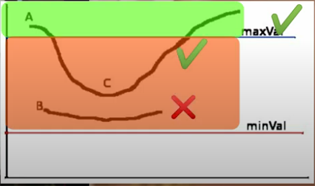


Los bordes que estén por encima del umbral máximo es decir el valor de umbral más alto se van a dibujar. Mientras que los bordes que esté por debajo del umbral máximo solamente se van a dibujar aquellos que sean la prolongación del borde con el umbral máximo, pero los bordes que solamente estén por debajo del umbral no se dibujarán.<br/>

Se puede experimentar con distintos umbrales hasta encontrar el que mejor se adapte a nuestro trabajo. Por ejemplo un umbral de valor muy bajo puede marcar bordes extras que hacen ruido a nuestro trabajo, en tanto umbrales muy alto pueden hacer que no se detecte algunos bordes que son necesarios para el proceso.



Además para mejorar los resultados se puede aplicar suavización de imagen previo a la aplicación de **Canny**.<br/>

Una vez obtenida la imgen binaria se aplica `cv2.findContours()` . Como argumentos se otorga la variable de la imagen binarizada,  luego un método `cv2.RETR_EXTERNAL` como segundo argumento que detecta solamente los contornos externos de los objetos, y como último argumento el método de aproximación del contorno `cv2.CHAIN_APROX_SIMPLE`.<br/>

A continuación se dibuja todos los contornos obtenidos con el metodo `cv2.drawCotours()` . A este método se le da cinco argumentos, primero la imagen en donde se van a visualizar los contornos, seguidos de la variable con todos los contornos el método `findContours()`, como tercer argumento **-1** que significa que se dibujen todos los contornos, como cuarto argumento el color en valores de **BGR** para que se vean los contornos en este color y por último el valor del grosor de dicho contorno.<br/>

Para estar seguros que se han detectado los elementos correctos, se puede imprimir por consola o incluso en la imagen con el método `cv2.putText()`.

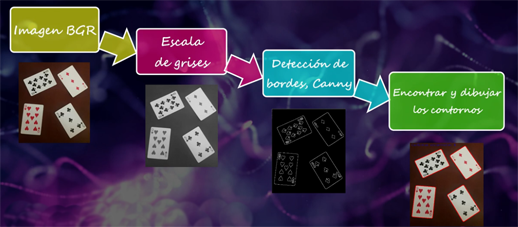

  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#Contando objetos con deteccion de bordes y Canny

import cv2

imagen17 = cv2.imread('Cartas.jpg')
grises = cv2.cvtColor(imagen17, cv2.COLOR_BGR2GRAY)
bordes_canny = cv2.Canny(grises, 100, 200)

_,cnts,_ = cv2.findContours(bordes_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(imagen, cnts, -1, (255,0,0), 2)

print("Contornos encontrados: ", len(cnts))

font = cv2.FONT_HERSEY_SIMPLEX
texto_cnts = "Contornos enconotrados: " + str(len(cnts))

cv2.putText(imagen17, texto_cnts, (10,20), font, 0.7, (146,0,90), 1)

cv2.imshow('Bordes', bordes_canny)
cv2.imshow('Imagen', imagen17)
cv2.waitKey(0)
cv2.destroyAllWindows()

#**Contando Objetos por sus Colores**

El proceso para contar los objetos por sus colores es comenzar leyendo la imagen en **BGR**, a dicha imagen se la transforma a un espacio de color **HSV** y se determina el rango de colores que se desea detectar. Luego hay que obtener las imágenes binarizadas que se usarán para encontrar y dibujar los contornos. A dichos contornos se le otorga un número. Finalmente se construye una imagen resumen en donde estén todos los contornos encontrados por cada color y la suma de todos ellos.<br/>

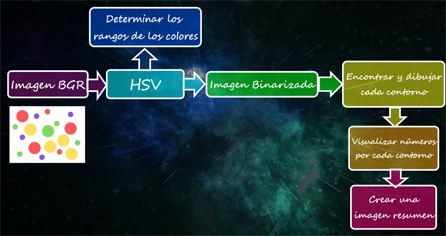

Se comienza leyendo una imagen con **OpenCV**, esta es una imagen de lunares de colores con cuatro colores, rojo, amarillo, violeta y verde.<br/>
Ahora es crucial detectar los colores según su **Rango de Color en HSV**:<br/>

- Para amarillo está entre 20 y 32 de HSV.

- Para violeta está entre 130 y 145 de HSV.

- Para verde está de 36 a 70 de HSV.

- Para rojo es un color esta presente tanto en el comienzo como en el final del rango de colores así que por ello se escriben dos veces. En un rango de 0 a 10 y de 175 a 180.

<br/><br/>
Una vez declarado los rango de color se usa el método `cv2.inRange()` para detectar el color y visualizar una imagen binarizada. Se realiza el mismo proceso por cada color, logrando así obtener una máscara por cada color que no son más que imágenes binarizadas.<br/>

Luego de estas máscaras se buscan los contornos y los centro de cada objeto diferenciados. El método `cv2.findCountours()` devolverá tres variables, pero solamente se necesita la segunda. Y luego se dibuja los contornos con el método `cv2.drawContours()`.<br/>

Para contar cada contorno de cada objeto se necesita la ayuda de un ciclo for y dentro de este hay que determinar el centro con `cv2.moments()` para obtener las coordenadas de `x`  `y`<br/>

De este modo se visualiza cada contorno en `c` y se los cuenta, incorporándole un texto con el método `cv2.putText()`. Hay que especificar el *i+1* para que el conteo comience en **1** y no en **0**.<br>

Para que detecte los otros colores se debe efectuar el mismo proceso por cada uno. Pero esto puede ser algo repetitivo si se quiere detectar muchos colores. Para ello conviene crear una función, como ser `dibujarContornos()` . En ella se necesitarán los contornos encontrados y el color que vamos a detectar en **BGR**.<br/>
Es momento de llamar a los otros colores y emplear esta función  `dibujarContornos()` para visualizar los resultados.

  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#Contar objetos por su color (para un solo tipo de color)

import cv2
import numpy as np


          #Delimitar los rangos de color en HSV

amarilloBajo = np.array([20,100,20], np.unit8)
amarilloAlto = np.array([32,255,255], np.unit8)

#Leer imagen y binalizarla
imagen18 = cv2.imread('lunares_de_colores.png')

imagenHSV = cv2.cvtColor(imagen18, cv2.COLOR_BGR2HSV)

#Detectando Colores
mask_Amarillo = cv2.inRange(imagenHSV, amarilloBajo, amarilloAlto)


#Encontrando un solo contorno
contornos_Amarillos = cv2.findContours(mask_Amarillo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
for (i, c) in enumarate(contornos_Amarillos):
  M = cv2.moments(c)
  if (M['m00']==0): M['m00']==1
  x = int(M['m10']/M['m00'])
  y = int(M['m01']/M['m00'])
  cv2.drawContours(imagen, [c], 0, (0,255,255), 2)
  cv2.putText(imagen18, str(i+1), (x-10,y+10), 1, 2, (0,0,0), 2)

Si se visualiza a todos los números de los colores a la vez podría llegar a ser confuso, por ello se utiliza el método `cv2.ones()` .
Este al principio estará en blanco.
Luego se le agrega los círculos correspondientes a cada color.<br/>

Para colocar el número de cada círculo de color se utiliza `cv2.putText()`. Y así se obtendrá una referencia de resumen, cada color con su correspondiente número de la cantidad de círculos u objetos de color contados.<br/>

Finalmente se pueden sumar todos los objetos de todos los colores para considerar la cantidad de objetos detectados y contados.

  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#Contar objetos por su color

import cv2
import numpy as np

#funcion con el iterador para dibujar contornos
def dibujarContornos(contorno, color):
  for (i, c) in enumarate(contorno):
    M = cv2.moments(c)
    if (M['m00']==0): M['m00']==1
    x = int(M['m10']/M['m00'])
    y = int(M['m01']/M['m00'])
    cv2.drawContours(imagen, [c], 0, color, 2)
    cv2.putText(imagen18, str(i+1), (x-10,y+10), 1, 2, (0,0,0), 2)


#Delimitar los rangos de color en HSV

amarilloBajo = np.array([20,100,20], np.unit8)
amarilloAlto = np.array([32,255,255], np.unit8)

violetaBajo = np.array([130,100,20], np.unit8)
violetaAlto = np.array([145,255,255], np.unit8)

verdeBajo = np.array([36,100,20], np.unit8)
verdeAlto = np.array([70,255,255], np.unit8)

rojoBajo1 = np.array([0,100,20], np.unit8)
rojoAlto1 = np.array([10,255,255], np.unit8)

rojoBajo2 = np.array([175,100,20], np.unit8)
rojoAlto2 = np.array([180,255,255], np.unit8)

#Leer imagen y binalizarla
imagen18 = cv2.imread('lunares_de_colores.png')

imagenHSV = cv2.cvtColor(imagen18, cv2.COLOR_BGR2HSV)

#Detectando Colores
mask_Amarillo = cv2.inRange(imagenHSV, amarilloBajo, amarilloAlto)
mask_Violeta = cv2.inRange(imagenHSV, violetaBajo, violetaAlto)
mask_Verde = cv2.inRange(imagenHSV, verdeBajo, verdeAlto)
mask_Rojo1 = cv2.inRange(imagenHSV, rojoBajo1, rojoAlto1)
mask_Rojo2 = cv2.inRange(imagenHSV, rojoBajo2, rojoAlto2)
mask_Rojo = cv2.add(mask_Rojo1,mask_Rojo2)

#Encontrando los contornos
contornos_Amarillo = cv2.findContours(mask_Amarillo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
contornos_Violeta = cv2.findContours(mask_Violeta, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
contornos_Verde = cv2.findContours(mask_Verde, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
contornos_Rojo = cv2.findContours(mask_Rojo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]


dibujarContornos(contornos_Amarillo, (0,255,255))
dibujarContornos(contornos_Violeta, (140,40,120))
dibujarContornos(contornos_Verde, (0,255,0))
dibujarContornos(contornos_Rojo, (0,0,255))


#Imagen de reseña o resumen por colores y cantidades
img_resumen= 255 * np.ones((210, 100, 3), dtype=np.uint8)
cv2.circle(img_resumen, (30,30), 15, (0,255,255), -1)
cv2.circle(img_resumen, (30,70), 15, (140,40,120), -1)
cv2.circle(img_resumen, (30,110), 15, (0,255,0), -1)
cv2.circle(img_resumen, (30,150), 15, (0,0,255), -1)

cv2.putText(img_resumen, str(len(contornos_Amarillos)), (65,40), 1, 2, (0,0,0), 2)
cv2.putText(img_resumen, str(len(contornos_Violeta)), (65,80), 1, 2, (0,0,0), 2)
cv2.putText(img_resumen, str(len(contornos_Verde)), (65,120), 1, 2, (0,0,0), 2)
cv2.putText(img_resumen, str(len(contornos_Rojo)), (65,160), 1, 2, (0,0,0), 2)

#Suma de todos los circulos de todos los colores
total_cnts = len(contornos_Amarillo) + len(contornos_Violeta) + len(contornos_Verde) + len(contornos_Rojo)
cv2.imshow('Resumen', img_resumen)
cv2.waitKey(0)
cv2.destroyAllWindows()

<img src="https://cdn.jsdelivr.net/gh/homarr-labs/dashboard-icons/svg/jupyter.svg" width="30" height="30" alt="Jupyter Notebook"/> Jupyter Notebook: Adaptación del script

In [ ]:
#Contar los objetos por su color en un Jupyter Notebook
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Contando objetos con detección de bordes y Canny
imagen17 = cv2.imread('Cartas.jpg')

if imagen17 is None:
    print("Error: No se pudo cargar la imagen 'Cartas.jpg'. Verifica la ruta del archivo.")
else:
    #Convertir a escala de grises
    grises = cv2.cvtColor(imagen17, cv2.COLOR_BGR2GRAY)

    #Detectar bordes con Canny
    bordes_canny = cv2.Canny(grises, 100, 200)

    #Encontrar contornos
    cnts, _ = cv2.findContours(bordes_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #Dibujar contornos en la imagen original
    imagen_resultado = imagen17.copy()
    cv2.drawContours(imagen_resultado, cnts, -1, (255, 0, 0), 2)

    print("Contornos encontrados:", len(cnts))

    #Añadir texto con el número de contornos
    font = cv2.FONT_HERSHEY_SIMPLEX
    texto_cnts = f"Contornos encontrados: {len(cnts)}"
    cv2.putText(imagen_resultado, texto_cnts, (10, 20), font, 0.7, (146, 0, 90), 1)

    #Mostrar imagenes
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(bordes_canny, cmap='gray')
    axes[0].set_title('Bordes (Canny)')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(imagen_resultado, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Imagen con Contornos')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

#Contar objetos por su color
def dibujarContornos(contorno, color, imagen, imagen_original):
    for i, c in enumerate(contorno):
        M = cv2.moments(c)
        if M['m00'] == 0:
            M['m00'] = 1               #evitar división por cero
        x = int(M['m10'] / M['m00'])
        y = int(M['m01'] / M['m00'])
        cv2.drawContours(imagen, [c], 0, color, 2)
        cv2.putText(imagen_original, str(i + 1), (x - 10, y + 10), font, 0.5, (0, 0, 0), 2)

#Definir rangos de color en HSV
amarilloBajo = np.array([20, 100, 20], dtype=np.uint8)
amarilloAlto = np.array([32, 255, 255], dtype=np.uint8)

violetaBajo = np.array([130, 100, 20], dtype=np.uint8)
violetaAlto = np.array([145, 255, 255], dtype=np.uint8)

verdeBajo = np.array([36, 100, 20], dtype=np.uint8)
verdeAlto = np.array([70, 255, 255], dtype=np.uint8)

rojoBajo1 = np.array([0, 100, 20], dtype=np.uint8)
rojoAlto1 = np.array([10, 255, 255], dtype=np.uint8)

rojoBajo2 = np.array([175, 100, 20], dtype=np.uint8)
rojoAlto2 = np.array([180, 255, 255], dtype=np.uint8)

#Leer imagen
imagen18 = cv2.imread('lunares_de_colores.png')

if imagen18 is None:
    print("Error: No se pudo cargar la imagen 'lunares_de_colores.png'. Verifica la ruta del archivo.")
else:
    #Convertir a HSV
    imagenHSV = cv2.cvtColor(imagen18, cv2.COLOR_BGR2HSV)

    #Crear mascaras para cada color
    mask_Amarillo = cv2.inRange(imagenHSV, amarilloBajo, amarilloAlto)
    mask_Violeta = cv2.inRange(imagenHSV, violetaBajo, violetaAlto)
    mask_Verde = cv2.inRange(imagenHSV, verdeBajo, verdeAlto)
    mask_Rojo1 = cv2.inRange(imagenHSV, rojoBajo1, rojoAlto1)
    mask_Rojo2 = cv2.inRange(imagenHSV, rojoBajo2, rojoAlto2)
    mask_Rojo = cv2.add(mask_Rojo1, mask_Rojo2)

    #Encontrar contornos
    contornos_Amarillo, _ = cv2.findContours(mask_Amarillo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contornos_Violeta, _ = cv2.findContours(mask_Violeta, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contornos_Verde, _ = cv2.findContours(mask_Verde, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contornos_Rojo, _ = cv2.findContours(mask_Rojo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #Dibujar contornos
    imagen_resultado = imagen18.copy()
    font = cv2.FONT_HERSHEY_SIMPLEX

    dibujarContornos(contornos_Amarillo, (0, 255, 255), imagen_resultado, imagen18)
    dibujarContornos(contornos_Violeta, (140, 40, 120), imagen_resultado, imagen18)
    dibujarContornos(contornos_Verde, (0, 255, 0), imagen_resultado, imagen18)
    dibujarContornos(contornos_Rojo, (0, 0, 255), imagen_resultado, imagen18)

    #Mostrar imagenes
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    axes[0, 0].imshow(cv2.cvtColor(imagen18, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Imagen Original')
    axes[0, 0].axis('off')

    axes[0, 1].imshow(mask_Amarillo, cmap='gray')
    axes[0, 1].set_title('Máscara Amarilla')
    axes[0, 1].axis('off')

    axes[0, 2].imshow(mask_Violeta, cmap='gray')
    axes[0, 2].set_title('Máscara Violeta')
    axes[0, 2].axis('off')

    axes[1, 0].imshow(mask_Verde, cmap='gray')
    axes[1, 0].set_title('Máscara Verde')
    axes[1, 0].axis('off')

    axes[1, 1].imshow(mask_Rojo, cmap='gray')
    axes[1, 1].set_title('Máscara Roja')
    axes[1, 1].axis('off')

    axes[1, 2].imshow(cv2.cvtColor(imagen_resultado, cv2.COLOR_BGR2RGB))
    axes[1, 2].set_title('Imagen con Contornos por Color')
    axes[1, 2].axis('off')

    plt.tight_layout()
    plt.show()

    #Imagen de resumen por colores y cantidades
    img_resumen = 255 * np.ones((210, 100, 3), dtype=np.uint8)

    cv2.circle(img_resumen, (30, 30), 15, (0, 255, 255), -1)        #amarillo
    cv2.circle(img_resumen, (30, 70), 15, (140, 40, 120), -1)       #violeta
    cv2.circle(img_resumen, (30, 110), 15, (0, 255, 0), -1)         #verde
    cv2.circle(img_resumen, (30, 150), 15, (0, 0, 255), -1)         #rojo

    cv2.putText(img_resumen, str(len(contornos_Amarillo)), (65, 40), font, 0.5, (0, 0, 0), 2)
    cv2.putText(img_resumen, str(len(contornos_Violeta)), (65, 80), font, 0.5, (0, 0, 0), 2)
    cv2.putText(img_resumen, str(len(contornos_Verde)), (65, 120), font, 0.5, (0, 0, 0), 2)
    cv2.putText(img_resumen, str(len(contornos_Rojo)), (65, 160), font, 0.5, (0, 0, 0), 2)

    #Mostrar imagen de resumen
    plt.figure(figsize=(6, 6))
    plt.title('Resumen por Colores')
    plt.imshow(cv2.cvtColor(img_resumen, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    #Suma de todos los circulos de todos los colores
    total_cnts = len(contornos_Amarillo) + len(contornos_Violeta) + len(contornos_Verde) + len(contornos_Rojo)
    print(f"Total de objetos detectados: {total_cnts}")

#[**Detectando Formas Geométricas**](https://www.youtube.com/watch?v=R82EcsCgnfg&list=PLBg7GSvtrU2MOLWM0bGU1_FT3LsJPyY-5&index=23)

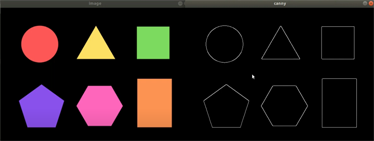


Primero se va a leer una imagen con **OpenCV** convertiéndola luego en escala de grise con `cv2cvtColor()`.<br/>

A continuación se necesita que la imagen esté binarizada, lo cual se hace con `cv2.Canny()` o con la umbralización simple con `cv2.threshold()`.<br/>

Luego se detectan los contornos externos con el método `cv2.findContours()` con la imagen, el modo y el método de aproximación como sus parámetros.<br/>

Para dibujar los contornos se utiliza `cv2.drawContours()` tal como lo vimos más arriba. Y lo mismo dentro de un for para ir dibujando los contornos de a uno a la vez.

Ahora bien para continuar con el proceso se va a conocer a **ApproxPolyDP** , esta es una función `approxPolyDP()` que nos va a ayudar a identificar cada una de las figuras en la imagen. Esta función aproxima curvas o una curva poligonal con una predicción específica. En otra parte de la documentación dice que aproxima en una forma de contorno en otra con menos números de vértices dependiendo de la precisión que le especifiquemos. Esto último sería como un polígono que cuanto mayor sea el números de lados se aproximará a la forma curva del círculo.<br/>

Bien, para utilizar el método `cv2.approxPolyDP()` se le pasarán tres parámetros, el tipo de contorno como el primero, como segundo parámetro la especificación de aproximación, para este último se necesitará de un cálculo que llamaremos **épsilon** y en breve lo explicaremos, y finalmente un argumento booleano para determinar el cierre de la curva, o sea si es un polígono cerrado en sus bordes o no, este último es **True** cuando la curva aproximada es cerrada o **False** cuando la curva aproximada es no cerrada.<br/>

### Épsilon
Corresponde al segundo argumento de `cv2.approxPolyDP()`, se calcula con la incorporación del método `cv2.archLength()` y dentro dos argumentos, el contorno que estemos analizando y otro argumento que puede ser **True** o **False** para indicar que la curva es cerrada (True) o no cerrada (False). Y todo esto multiplicado por un porcentaje.<br/>

     epsilon = porcentaje * cv2.approxPolyDP(curve, closed)

En nuestro caso el porcentaje será de 10% o sea 0.1, pero no se han obtenido resultados satisfactorios, en tanto con el 1%, o sea 0.01 mejoraron sensiblemente los resultados.<br/>

Entonces, se calcula primero épsilon y luego la aproximación del polígono.<br/>

Para continuar se imprimen los puntos con `len()` y adentro del mismo la variable de aproximación.<br/>

Finalmente dibujamos los contornos con el método `cv2.drawContours()` y lo mostramos en pantalla con `cv2.imshow()`<br/>

### Diferenciar figuras geométricas


Para diferenciar entre los distintos tipos de figuras geométricas se va a utilizar el método `cv2.boundingRect()` , con este colocaremos el texto según las variables resultantes de `x`   `y`<br/>
Además con los datos obtenidos de ancho y alto se podrán diferenciar entre cuadrado y rectángulo.<br/>

Ya que se pueden contar los puntos, entonces si `len(approx)==3` entonces se identificará como un triángulo.<br/>
Del mismo modo si tiene 4 puntos podría ser un cuadrado o un rectángulo, esto se soluciona con el **aspect ratio**.<br/>El **aspect ratio** se obtiene de la relación del alto y ancho de la figura. Si ambas medidas mantienen el mismo valor el aspect ratio será igual a 1, o sea equivalente entre los lados, mientras que otras relaciones como 16:9 = 1.77 o 4:3 = 1.33 o 100:40 = 2.5
 denotarán la presencia de un rectángulo.<br/>

Para cada una de las figuras geométricas se tendrán en cuenta la cantidad de puntos de dicha figura.<br/>

En tanto que para detectar un cículo se podrá configurar al condicional como si la cantidad de puntos es mayor a 10 o a 14 se considerará como círculo.

###Posibles errores

En muchos casos los resultados obtenidos en la cantidad de puntos de los vértices no son los esperados y nos pueden dar algunos dolores de cabeza, para esto se debe ajustar el porcentaje de **épsilon**, si por caso no se obtienen los resultados deseados, se puede probar con observar si la imagen binarizada este correctamente marcada y que no hayan bordes cortados.<br/>

Si hay bordes cortados se lo solucionará aplicando **dilatación y erosión** a la imagen, se usa entonces los métodos `cv2.dilate()` con tres argumentos, `canny` primero, `None` en el segundo argumento y `iteration=1` como tercer argumento, y el método `cv2.erode()` con idénticos argumentos.<br/>

  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#Deteccion de figuras geometricas

import cv2

imagen19 = cv2.imread('figurasGeometrica.png')
gray = cv2.cvtColor(imagen19, cv2.COLOR_BGR2GRAY)

canny = cv2.Canny(gray, 10, 150)
canny = cv2.dilate(canny, None, iteration=1)
canny = cv2.erode(canny, None, iteration=1)

# _, th = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

_,cnts,_ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(imagen19, cnts, -1, (0,255,0), 2)

for c in cnts:
  epsilon = 0.01 * cv2.arcLength(c, True)
  approx = cv2.approxPolyDP(c, epsilon, True)
  print(len(approx))
  x,y,w,h = cv2.boundingRect(approx)

  if len(approx) == 3:
    cv2.putText(imagen19, 'Triangulo', (x,y-5), 1, 1, (0,255,0), 1)

  if len(approx) == 4:
    aspect_ratio = float(x)/h
    print('aspect_ratio= ',aspect_ratio)
    if aspect_ratio == 1:
      cv2.putText(imagen19, 'Cuadrado', (x,y-5), 1, 1, (0,255,0), 1)
    else:
      cv2.putText(imagen19, 'Rectangulo', (x,y-5), 1, 1, (0,255,0), 1)

  if len(approx) == 5:
    cv2.putText(imagen19, 'Pentagono', (x,y-5), 1, 1, (0,255,0), 1)

  if len(approx) == 6:
    cv2.putText(imagen19, 'Hexagono', (x,y-5), 1, 1, (0,255,0), 1)

  if len(approx) == 10:
    cv2.putText(imagen19, 'Circulo', (x,y-5), 1, 1, (0,255,0), 1)

  cv2.drawContours(imagen19, [approx], 0, (0,255,0), 2)
  cv2.imshow('Imagen', imagen19)
  cv2.waitKey(0)

cv2.imshow('Imagen', imagen19)
cv2.waitKey(0)
cv2.destroyAllWindows()

Una aclarción con respecto a la función `findContours()` .
 Esta tiene una diferencia en el retorno entre la versión de **OpenCV versión 3** con **OpenCV versión 4**. Las diferencias son:<br/>

- **OpenCV 3** `findContours()` devuelve tres valores: imagen, contorno y herencia.

- **OpenCV 4** `findContours()` devuelve dos valores: contorno y herencia.
<br/>

Para saber cuál es la versión de **OpenCV** desde la terminal:<br/>
```
>>> import cv2
>>> cv2.__version__
```
Para saber la versión de **OpenCV** desde un script de **Python** y ejecutarlo:<br/>
```
>>> import cv2

>>> print(cv2.__version__)
```

<img src="https://cdn.jsdelivr.net/gh/homarr-labs/dashboard-icons/svg/jupyter.svg" width="30" height="30" alt="Jupyter Notebook"/> Jupyter Notebook: Adaptación del script

In [ ]:
#Deteccion de figuras geometricas en un Jupyter Notebook
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Imagen de origen
imagen19 = cv2.imread('figurasGeometrica.png')

if imagen19 is None:
    print("Error: No se pudo cargar la imagen 'figurasGeometrica.png'. Verifica la ruta del archivo.")
else:
    #Convertir a escala de grises
    gray = cv2.cvtColor(imagen19, cv2.COLOR_BGR2GRAY)

    #Detectar bordes con Canny
    canny = cv2.Canny(gray, 10, 150)
    #Dilatar y erosionar para mejorar los bordes
    canny = cv2.dilate(canny, None, iterations=1)
    canny = cv2.erode(canny, None, iterations=1)

    #Encontrar contornos
    cnts, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #Dibujar contornos y etiquetas en la imagen original
    imagen_resultado = imagen19.copy()

    for c in cnts:
        epsilon = 0.01 * cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, epsilon, True)
        print(len(approx))
        x, y, w, h = cv2.boundingRect(approx)

        if len(approx) == 3:
            cv2.putText(imagen_resultado, 'Triangulo', (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        elif len(approx) == 4:
            aspect_ratio = float(w) / h
            print('aspect_ratio =', aspect_ratio)
            if 0.9 <= aspect_ratio <= 1.1:                   #se puede permitir una leve tolerancia para considerarse cuadrado
                cv2.putText(imagen_resultado, 'Cuadrado', (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            else:
                cv2.putText(imagen_resultado, 'Rectangulo', (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        elif len(approx) == 5:
            cv2.putText(imagen_resultado, 'Pentagono', (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        elif len(approx) == 6:
            cv2.putText(imagen_resultado, 'Hexagono', (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        elif len(approx) >= 7:                                #se considera circulo si tiene muchos vértices
            cv2.putText(imagen_resultado, 'Circulo', (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        cv2.drawContours(imagen_resultado, [approx], 0, (0, 255, 0), 2)

    #Mostrar imagenes
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(cv2.cvtColor(imagen19, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Imagen Original')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(imagen_resultado, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Detección de Figuras Geométricas')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

#[**Métodos FigColor & FigName**](https://www.youtube.com/watch?v=CsS0V6pDsBM&list=PLBg7GSvtrU2MOLWM0bGU1_FT3LsJPyY-5&index=24)

Hasta ahora se ha realizado el reconocimiento de figuras geométricas a través de la detección de los bordes y y los hemos dibujado y contado. Se podría decir que es un metodología tradicional.<br/>

A continuación se va a desarrollar el código a través de la función `figColor()` la cual necesita como parámetro de entrada una imagen en HSV, luego en el cuerpo de la función establecemos los colores que vamos a trabajar, escribiendo sus umbral alto y bajo del rango de colores **HSV**.<br/>

Luego dentro de dicha función se establece la binarización de las imágenes, donde negro representa la ausencia del objeto en la imagen y blanco representa al objeto en cuestión, dicho proceso se realiza a través del método `cv2.inRange()`. Este proceso nos servirá para poder encontrar el contorno correspondiente de cada color y cada procedimiento se hace por separado por cada color.<br/> Entonces para encontrar los contornos se utiliza el método `cv2.fundContours()` ya descrito más arriba y que se encuentren en la *posición 1*.<br/>

Luego lo que se hace es contar cuántos contornos se encuentran por cada color, utilizando simplemente un condicional y `len()` con la variable del contorno. Esto último nos servirá para que nos devuelva el nombre del color que ha sido detectado.<br/>

Ahora si hay que referirse a **figName**. La función `figName()` se le entrega el contorno, su ancho y su altura como parámetros. Con esta función se va a diferenciar entre los distintos tipos de figuras según sus puntos de vértices. Esta función retornará entonces el nombre de la figura detectada.<br/>

Ahora ya está todo listo para leer la imagen, se le aplica `cv2.imread()`. A esta imagen hay que pasarla a escala de grises con `cv2.cvtColor()`. Luego **Canny** va a ayudar para la detección de bordes con `cv2.Canny()`. A este se le añade las transformaciones morfológicas con `cv2.dilate()` y `cv2.erode()` para mejorar la calidad de los bordes y asegurarse que serán detectados.<br/>

Aplicar nuevamente `cv2.findContours()` para encontrar los contornos. Además hay que transformar la imagen de entrada de **BGR** a **HSV** que nos servirá para alimentar a la función `cv2.figColor()` que permitirá finalmente detectar los colores de las figuras.<br/>

Se visualiza la imagen original, la imagen binarizada y la imagen en **HSV**.<br/>

Para tratar los contornos de forma independiente se utiliza un ciclo for. Dentro del mismo se utiliza el método `cv2.boundingRect()` que retornará cuatro variables, `x`  `y`  `w`  `h`, las dos últimas de ellas para difereciar entre cuadrado y rectángulo según su aspect ratio. A continuación se crea una imagen auxiliar de negro de dos dimensiones con el mismo ancho y alto de la imagen de entrada, para ello se usa **Numpy** con `np.zeros()` y se especifica su tamaño con `imagen.shape[:2]`, a continuación se dibujará un contorno en la imagen auxiliar, dicho contorno será en realidad una figura completa de color blanco. Ahora bien, con la ayuda de `cv2.bitwise_and()` se va a obtener una imagen en **HSV** pero en donde se presentará de a una a la vez ya que se esta dentro del ciclo for, el fondo de la imagen será negro.<br/>

Ahora ya estamos listos para aplicar las dos funciones antes explicadas.<br/> Comenzaremos con **figName**, al método `figName()` se le almacenará el contorno, el ancho y el alto como argumentos, y se almacena en una variable llamada `name`. En tanto al método `figColor()` se le dará la máscara de **HSV** como argumento y se lo almacenará en la variable `color`. Como se va a visualizar tanto el nombre de las figuras geométricas como su color voy a concatenar estas dos variables que se almacenarán en la variable *nameColor*. Finalmente se visualiza este texto en la imagen de entrada a través de `cv2.putText()`.<br/>
Por supuesto se utiliza a `cv2.imshow()` para la visualización final.<br/>

  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#Usando el metodo figColor()

import cv2

def figColor(imagenHSV):
  #Rojo
  rojoBajo1 = np.array([0,100,20], np.uint8)
  rojoAlto1 = np.array([10,255,255], np.uint8)
  rojoBajo2 = np.array([175,100,20], np.uint8)
  rojoAlto2 = np.array([180,255,255], np.uint8)

  #Naranja
  naranjaBajo = np.array([11,100,20], np.uitn8)
  naranjaAlto = np.array([19,255,255], np.uitn8)

  #Amarillos
  amarilloBajo = np.array([20,100,20], np.uint8)
  amarilloAlto = np.array([32,255,255], np.uint8)

  #Verde
  verdeBajo = np.array([36,100,20], np.uint8)
  verdeAlto = np.array([70,255,255], np.uint8)

  #Violeta
  violetaBajo = np.array([130,100,20], np.uitn8)
  violetaAlto = np.array([145,255,255], np.uitn8)

  #Rosa
  rosaBajo = np.array([146,100,20], np.uint8)
  rosaAlto = np.array([170,255,255], np.uint8)

  #Se buscan los colores en la imagen segun los limites altos
  #y los bajos

  mask_Rojo1 = cv2.inRange(imagenHSV, rojoBajo1, rojoAlto1)
  mask_Rojo2 = cv2.inRange(imagenHSV, rojoBajo2, rojoAlto2)
  mask_Rojo = cv2.add(mask_Rojo1,mask_Rojo2)
  mask_Naranja = cv2.inRange(imagenHSV, naranjaBajo, naranjaAlto)
  mask_Amarillo = cv2.inRange(imagenHSV, amarilloBajo, amarilloAlto)
  mask_Verde = cv2.inRange(imagenHSV, verdeBajo, verdeAlto)
  mask_Violeta = cv2.inRange(imagenHSV, violetaBajo, violetaAlto)
  mask_Rosa = cv2.inRange(imagenHSV, rosaBajo, rosaAlto)

  #Buscar los contornos de las figuras

  contornos_Rojo = cv2.findContours(mask_Rojo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
  contornos_Naranja = cv2.findContours(mask_Naranja, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
  contornos_Amarillo = cv2.findContours(mask_Amarillo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
  contornos_Verde = cv2.findContours(mask_Verde, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
  contornos_Violeta = cv2.findContours(mask_Violeta, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
  contornos_Rosa = cv2.findContours(mask_Rosa, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]

  #Contar los contornos por cada color

  if len(contornos_Rojo)>0: color = 'Rojo'
  elif len(contornos_Naranja)>0: color = 'Naranja'
  elif len(contornos_Amarillo)>0: color = 'Amarillo'
  elif len(contornos_Verde)>0: color = 'Verde'
  elif len(contornos_Violeta)>0: color = 'Violeta'
  elif len(contornos_Rosa)>0: color = 'Rosa'

  return color

def figName(contorno, width, height):
  epsilon = 0.01 * cv2.arcLength(contorno, True)
  approx = cv2.approxPolyDP(contorno, epsilon, True)

  if len(approx) == 3:
    nameFig = 'Triangulo'
  if len(approx) == 4:
    aspect_ratio = float(width) / height
    if aspect_ratio == 1:
      nameFig = 'Cuadrado'
    else:
      nameFig = 'Rectangulo'
  if len(approx) == 5:
    nameFig = 'Pentagono'
  if len(approx) == 6:
    nameFig = 'Hexagono'
  if len(approx) == 10:
    nameFig = 'Circulo'

  return nameFig

imagen20 = cv2.imread('figurasGeometricas.png')
gray = cv2.cvtColor(imagen20, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 10, 150)
canny = cv2.dilate(canny, None, iteration=1)
canny = cv2.erode(canny, None, iteration=1)


_, contornos, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
imagenHSV = cv2.cvtColor(imagen20, cv2.COLOR_BGR2HSV)

for c in contornos:
  x,y,w,h = cv2.boundingRect(c)
  imAux = np.zeros(imagen20.shape[:2], dtype="uint8")
  imAux = cv2.drawContours(imAux, [c], -1, 255, -1)
  maskHSV = cv2.bitwise_and(imagenHSV, imagenHSV, mask=imAux)
  name = figName(c, w, h)
  color = figColor(maskHSV)
  nameColor = name + ' ' + color
  cv2.putText(imagen20, nameColor, (x,y-5), 1, 0.8, (0,255,0), 1)
  cv2.imshow('imagen20', imagen20)
  cv2.waitKey(0)

cv2.waitKey(0)
cv2.destroyAllWindows()


<img src="https://cdn.jsdelivr.net/gh/homarr-labs/dashboard-icons/svg/jupyter.svg" width="30" height="30" alt="Jupyter Notebook"/> Jupyter Notebook: Adaptación del script

In [ ]:
#FigColor en un Jupyter Notebook
import cv2
import numpy as np
import matplotlib.pyplot as plt

def figColor(imagenHSV):
    #Rojo
    rojoBajo1 = np.array([0, 100, 20], dtype=np.uint8)
    rojoAlto1 = np.array([10, 255, 255], dtype=np.uint8)
    rojoBajo2 = np.array([175, 100, 20], dtype=np.uint8)
    rojoAlto2 = np.array([180, 255, 255], dtype=np.uint8)

    #Naranja
    naranjaBajo = np.array([11, 100, 20], dtype=np.uint8)
    naranjaAlto = np.array([19, 255, 255], dtype=np.uint8)

    #Amarillo
    amarilloBajo = np.array([20, 100, 20], dtype=np.uint8)
    amarilloAlto = np.array([32, 255, 255], dtype=np.uint8)

    #Verde
    verdeBajo = np.array([36, 100, 20], dtype=np.uint8)
    verdeAlto = np.array([70, 255, 255], dtype=np.uint8)

    #Violeta
    violetaBajo = np.array([130, 100, 20], dtype=np.uint8)
    violetaAlto = np.array([145, 255, 255], dtype=np.uint8)

    #Rosa
    rosaBajo = np.array([146, 100, 20], dtype=np.uint8)
    rosaAlto = np.array([170, 255, 255], dtype=np.uint8)

    #Se buscan los colores en la imagen según los límites altos y bajos
    mask_Rojo1 = cv2.inRange(imagenHSV, rojoBajo1, rojoAlto1)
    mask_Rojo2 = cv2.inRange(imagenHSV, rojoBajo2, rojoAlto2)
    mask_Rojo = cv2.add(mask_Rojo1, mask_Rojo2)
    mask_Naranja = cv2.inRange(imagenHSV, naranjaBajo, naranjaAlto)
    mask_Amarillo = cv2.inRange(imagenHSV, amarilloBajo, amarilloAlto)
    mask_Verde = cv2.inRange(imagenHSV, verdeBajo, verdeAlto)
    mask_Violeta = cv2.inRange(imagenHSV, violetaBajo, violetaAlto)
    mask_Rosa = cv2.inRange(imagenHSV, rosaBajo, rosaAlto)

    #Encontrar los contornos de las figuras
    contornos_Rojo, _ = cv2.findContours(mask_Rojo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contornos_Naranja, _ = cv2.findContours(mask_Naranja, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contornos_Amarillo, _ = cv2.findContours(mask_Amarillo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contornos_Verde, _ = cv2.findContours(mask_Verde, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contornos_Violeta, _ = cv2.findContours(mask_Violeta, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contornos_Rosa, _ = cv2.findContours(mask_Rosa, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #Contar los contornos por cada color
    if len(contornos_Rojo) > 0:
        color = 'Rojo'
    elif len(contornos_Naranja) > 0:
        color = 'Naranja'
    elif len(contornos_Amarillo) > 0:
        color = 'Amarillo'
    elif len(contornos_Verde) > 0:
        color = 'Verde'
    elif len(contornos_Violeta) > 0:
        color = 'Violeta'
    elif len(contornos_Rosa) > 0:
        color = 'Rosa'
    else:
        color = 'Desconocido'

    return color

def figName(contorno, width, height):
    epsilon = 0.01 * cv2.arcLength(contorno, True)
    approx = cv2.approxPolyDP(contorno, epsilon, True)

    if len(approx) == 3:
        nameFig = 'Triangulo'
    elif len(approx) == 4:
        aspect_ratio = float(width) / height
        if 0.9 <= aspect_ratio <= 1.1:
            nameFig = 'Cuadrado'
        else:
            nameFig = 'Rectangulo'
    elif len(approx) == 5:
        nameFig = 'Pentagono'
    elif len(approx) == 6:
        nameFig = 'Hexagono'
    elif len(approx) >= 7:
        nameFig = 'Circulo'
    else:
        nameFig = 'Desconocido'

    return nameFig

#imagen original
imagen20 = cv2.imread('figurasGeometricas.png')

if imagen20 is None:
    print("Error: No se pudo cargar la imagen 'figurasGeometricas.png'. Verifica la ruta del archivo.")
else:
    #Convertir a escala de grises
    gray = cv2.cvtColor(imagen20, cv2.COLOR_BGR2GRAY)

    #Detectar bordes con Canny
    canny = cv2.Canny(gray, 10, 150)
    #Dilatar y erosionar para mejorar los bordes
    canny = cv2.dilate(canny, None, iterations=1)
    canny = cv2.erode(canny, None, iterations=1)

    #Encontrar contornos
    contornos, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #Convertir a HSV
    imagenHSV = cv2.cvtColor(imagen20, cv2.COLOR_BGR2HSV)

    #Dibujar contornos y etiquetas en la imagen original
    imagen_resultado = imagen20.copy()

    for c in contornos:
        x, y, w, h = cv2.boundingRect(c)
        imAux = np.zeros(imagen20.shape[:2], dtype="uint8")
        imAux = cv2.drawContours(imAux, [c], -1, 255, -1)
        maskHSV = cv2.bitwise_and(imagenHSV, imagenHSV, mask=imAux)
        name = figName(c, w, h)
        color = figColor(maskHSV)
        nameColor = name + ' ' + color
        cv2.putText(imagen_resultado, nameColor, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    #Mostrar imagenes
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(cv2.cvtColor(imagen20, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Imagen Original')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(imagen_resultado, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Detección de Figuras y Colores')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

#[**Resaltar un Color de una Imagen del Fondo en Grises**](https://www.youtube.com/watch?v=AEsqJSTQJgk&list=PLBg7GSvtrU2MOLWM0bGU1_FT3LsJPyY-5&index=35)

Primero hay que asegurarse de tener imágenes de prueba, si el color elegido será el rojo bueno se buscarán tener imágenes que posean objeto de color rojo dentro de ellas.<br/>

Importar en el código a **OpenCV**, **Numpy** e **Imutils**. Este último va a servir para redimensionar la imagen.<br/>

A continuación se prepara el código con el color rojo en HSV. Vale recordar que **OpenCV** tiene por default una lectura de los colores en BGR. Entonces hay que marcar el paso alto y paso bajo del rango de frecuencia de colores en HSV. Luego se lee la imagen que se va a trabajar.<br/>


Si la imagen con la que van a trabajar está muy grande, lo conveniente es redimensionarla con el método `imutils.resize()`, estableciendo así un ancho más acorde para su visionado.<br/>

Una vez que se obtiene la imagen, se convierte en escala de grises. Y también se va a trasformar la misma imagen de entrada a un espacio HSV.<br/>

Para detectar un color rojo o un color determinado se va a crear una máscara usando el método `cv2.inRange()` dandole como argumentos la variable de la imagen en HSV, el paso alto y el paso bajo de la frecuencia del color. Tengase en cuenta que particularmente para el color rojo esta detección se divide en dos máscaras separadas.<br/>

Del proceso anterior se obtiene una imagen binarizada de la cual indica que la zona blanca va a identificar al color seleccionado, en tanto el espacio en negro a la ausencia del mismo. Con el método `cv2.medianBlur()` se mejorara la captacion de los contornos del area en blanco y por lo tanto una mejor detección del color.<br/>

Para que el área en blanco muestre el color real que se le ha indicado se debe usar el método `cv2.bitwise_and()`, cuyo primer y segundo argumentos sin la imagen original y como tercer argumento la máscara.<br/>

Hasta aquí logramos que se vea las zonas del color seleccionado en su color original y el resto todo negro.<br/>

Ahora se trabaja con el fondo de la imagen, la cual se necesita que esté en escala de grises. Lo que se hace es tomar la imagen binarizada que ya teníamos y se la invierte, eso se guardará en una variable. A continuación se va a ocupar el método `cv2.birwise_and()` para que el área blanca se reemplace por la imagen en escala de grises. Con esto ya se tiene el fondo de la imagen que se está visualizando en escala de grises.<br/>

Ahora lo que se tiene que hacer es sumar ambas imágenes para lograr el efecto deseado.<br/>

$Atención$ : hay que tener cuidado en que al momento en que se transforma a escalas de grises, tal como se hace en el código de abajo en la variable `imageGray`, ya la imagen no va a tener tres canales BGR sino que va a tener un canal y este se utiliza para obtener la imagen en grises con `cv2.COLOR_BGR2GRAY`. Mientra que cuando se está utilizando en la variable `grayDetected` se puede tener en color y por lo tanto se obtiene una imagen en BGR. Entonces no se va a poder sumar una imagen que tiene tres canales con una imagen que tiene un solo canal, poner mucha atención en esto, pero para resolver esto, hay que revisar que luego de pasar de BGR a escala de grises en `imageGray`, y pasarla nuevamente de escala de grises a BGR. Esto no quiere decir que la imagen va a presentar colores sino que la imagen se va a ver como escala de grises pero recuperando sus tres canales. De este modo se corrige dicho error.<br/>

Finalmente se observan los resultados en una imagen de salida con `cv2.imshow()`<br/>

  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#Resaltar un color con OpenCV
import cv2
import numpy as np
import imutils

#Para color rojo
rojoBajo1 = np.array([0,140,90], np.uint8)
rojoAlto1 = np.array([8,255,255], np.uint8)
rojoBajo2 = np.array([160,140,90], np.uint8)
rojoAlto2 = np.array([180,255,255], np.uint8)

#Leer la imagen
imagen = cv2.imread('rosas.jpeg')
imagen = imutils.resize(imagen, width=640)

#Transformando a otros espacios de color
imageGray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
imageGray = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)  #Aqui es para sumarla mas adelante
imageHSV = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

#Detectando el color rojo, mascaras
maskRojo1 = cv2.inRange(imageHSV, rojoBajo1, rojoAlto1)
maskRojo2 = cv2.inRange(imageHSV, rojoBajo2, rojoAlto2)
mask = cv2.add(maskRojo1, maskRojo2)
mask = cv2.medianBlur(mask, 7)
redDetected = cv2.bitwise_and(imageGray, imageGray, mask=mask)

#Fondo en grises
invMask = cv2.bitwise_not(mask)
bgGray = cv2.bitwise_and(imageGray, imageGray, mask=invMask)

#Sumamos bgGray y redDetected
finalImage =  cv2.add(bgGray, redDetected)

#Visualizacion
cv2.imshow('Imagen', imagen)             #Para visualizar la imagen original
cv2.imshow('redDetected', redDetected)   #Para visualizar la imagen con el color rojo y fondo negro
cv2.imshow('bgGray', bgGray)             #Para visualizar la imagen en escala de grises
cv2.imshow('finalImage', finalImage)     #Para visualizar la imagen final con los objetos de color rojo destacados y el fondo en escala de grises
cv2.waitKey(0)
cv2.destroyAllWindows()



<img src="https://cdn.jsdelivr.net/gh/homarr-labs/dashboard-icons/svg/jupyter.svg" width="30" height="30" alt="Jupyter Notebook"/> Jupyter Notebook: Adaptación del script

In [ ]:
#Resaltar un color con OpenCV en un Jupyter Notebook
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Para color rojo
rojoBajo1 = np.array([0, 140, 90], dtype=np.uint8)
rojoAlto1 = np.array([8, 255, 255], dtype=np.uint8)
rojoBajo2 = np.array([160, 140, 90], dtype=np.uint8)
rojoAlto2 = np.array([180, 255, 255], dtype=np.uint8)

#Subir la imagen
imagen = cv2.imread('rosas.jpeg')

if imagen is None:
    print("Error: No se pudo cargar la imagen 'rosas.jpeg'. Verifica la ruta del archivo.")
else:
    #Redimensionar la imagen manteniendo la proporcion (sin usar imutils)
    height, width = imagen.shape[:2]
    new_width = 640
    new_height = int(height * new_width / width)
    imagen = cv2.resize(imagen, (new_width, new_height))

    #Transformando a otros espacios de color
    imageGray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    imageGray = cv2.cvtColor(imageGray, cv2.COLOR_GRAY2BGR)  #convertir a 3 canales para poder sumarla mas adelante
    imageHSV = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

    #Detectando el color rojo, mascaras
    maskRojo1 = cv2.inRange(imageHSV, rojoBajo1, rojoAlto1)
    maskRojo2 = cv2.inRange(imageHSV, rojoBajo2, rojoAlto2)
    mask = cv2.add(maskRojo1, maskRojo2)
    mask = cv2.medianBlur(mask, 7)
    redDetected = cv2.bitwise_and(imageGray, imageGray, mask=mask)

    #Fondo en grises
    invMask = cv2.bitwise_not(mask)
    bgGray = cv2.bitwise_and(imageGray, imageGray, mask=invMask)

    #Sumamos bgGray y redDetected
    finalImage = cv2.add(bgGray, redDetected)

    #Mostrar imagenes
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    axes[0, 0].imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Imagen Original')
    axes[0, 0].axis('off')

    axes[0, 1].imshow(cv2.cvtColor(redDetected, cv2.COLOR_BGR2RGB))
    axes[0, 1].set_title('Color Rojo Detectado (fondo negro)')
    axes[0, 1].axis('off')

    axes[1, 0].imshow(cv2.cvtColor(bgGray, cv2.COLOR_BGR2RGB))
    axes[1, 0].set_title('Fondo en Escala de Grises')
    axes[1, 0].axis('off')

    axes[1, 1].imshow(cv2.cvtColor(finalImage, cv2.COLOR_BGR2RGB))
    axes[1, 1].set_title('Imagen Final (rojo resaltado, fondo en grises)')
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

En la adaptación a **Jupyter** se usan subplots para mostrar la imagen original, el color rojo detectado, el fondo en grises y la imagen final. A través de la función `cv2.cvtColor()` se convierte de BGR a RGB cuando se muestra una imagen en color. También se añadió una verificación para asegurarse de que la imagen se haya cargado correctamente. Y principalmente y dada imposibilidad de utilizar **imutils** para redimensionar la imagen, entonces se debe calcular manualmente el nuevo tamaño manteniendo la proporción de la imagen.

#[**Efecto Espejo**](https://www.youtube.com/watch?v=aDK-PaQACIU&list=PLBg7GSvtrU2MOLWM0bGU1_FT3LsJPyY-5&index=19)


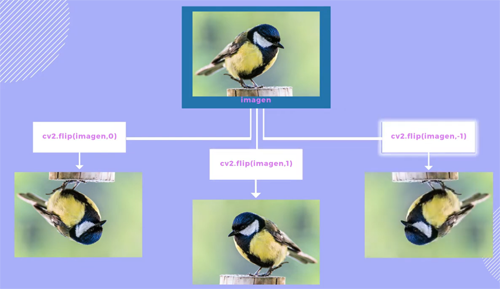



Para realizar este proceso se recurre al método `cv2.flip()`. Este tiene tres condiciones según como se dispongan su segundo parámetro. Con **0** la **imagen gira 180°** de arriba a abajo en su eje vertical, si se ingresa **1** la **imagen gira 180°** en su eje horizontal, y si se ingresa **-1** la **imagen gira en ambas formas** o sea 180° en su eje horizontal más 180° en su eje vertical.<br/>

Para averiguar la cantidad de elementos en alto, ancho y profundidad, es decir los elementos totales de la matriz correspondiente a la imagen se imprime `print('frame.shape=', frame.shape)`<br/>

Como lo que se pretende es realizar el efecto espejo, hay que dividir la imagen en dos, usando `frame.shape[1]` correspondiente al número de elementos a lo ancho dividido entre dos.<br/>

Finalmente se reemplaza la imagen de la mitad de la izquierda, aplicando a esta última `cv2.flip()` para invertir horizontalmente. Y listo.<br/>



  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#Hacer flip y girar la imagen en sus tres posibilidades

import cv2

cap = cv2.VideoCapture(0)

while True:
  ret,  frame = cap.read()
  if ret == False: break

  flip1 = cv2.flip(frame, 0)
  flip2 = cv2.flip(frame, 1)
  flip3 = cv2.flip(frame, -1)

  cv2.imshow('Flip1', flip1)
  cv2.imshow('Flip2', flip2)
  cv2.imshow('Flip3', flip3)

  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

cv2.release()
cv2.destroyAllWindows()


In [ ]:
#Realizar el efecto espejo

import cv2

cap = cv2.VideoCapture(0)

while True:
  ret,  frame = cap.read()
  if ret == False: break

  print('frame.shape', frame.shape)
  anchoMitad = frame.shape[1] // 2                            #dividir la imagen a la mitad

  frame[:,:anchoMitad] = cv2.flip(frame[:,anchoMitad:], 1)    #efecto espejo con flip

  cv2.imshow('Frame', frame)

  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

cv2.release()
cv2.destroyAllWindows()

<img src="https://cdn.jsdelivr.net/gh/homarr-labs/dashboard-icons/svg/jupyter.svg" width="30" height="30" alt="Jupyter Notebook"/> Jupyter Notebook: Adaptación del script

In [ ]:
#Simular un efecto espejo con OpenCV en un Jupyter Notebook
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Leer una imagen de ejemplo (se puede usar una imagen local)
imagen = cv2.imread('ejemplo.jpg')

if imagen is None:
    print("Error: No se pudo cargar la imagen. Verifica la ruta del archivo.")
    #Creamos una imagen de ejemplo si no se puede cargar una imagen real
    imagen = np.zeros((480, 640, 3), dtype=np.uint8)
    imagen[:] = [100, 150, 200]  #color azul claro
    cv2.rectangle(imagen, (100, 100), (300, 300), (0, 255, 0), -1)  #rectangulo verde
    cv2.circle(imagen, (400, 200), 80, (0, 0, 255), -1)  #circulo rojo

#Aplicar los diferentes tipos de flip
flip1 = cv2.flip(imagen, 0)  #voltear verticalmente
flip2 = cv2.flip(imagen, 1)  #voltear horizontalmente
flip3 = cv2.flip(imagen, -1) #voltear vertical y horizontalmente (180 grados)

#Mostrar las imagenes con flip
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Imagen Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(cv2.cvtColor(flip1, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Flip Vertical (cv2.flip(frame, 0))')
axes[0, 1].axis('off')

axes[1, 0].imshow(cv2.cvtColor(flip2, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Flip Horizontal (cv2.flip(frame, 1))')
axes[1, 0].axis('off')

axes[1, 1].imshow(cv2.cvtColor(flip3, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Flip Vertical + Horizontal (cv2.flip(frame, -1))')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

#Efecto espejo: tomar la mitad derecha de la imagen y reflejarla en la mitad izquierda
anchoMitad = imagen.shape[1] // 2  #dividir la imagen a la mitad

#crear una copia para el efecto espejo
imagen_espejo = imagen.copy()
imagen_espejo[:, :anchoMitad] = cv2.flip(imagen[:, anchoMitad:], 1)  #efecto espejo con flip

#Mostrar la imagen original y la imagen con efecto espejo
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(imagen_espejo, cv2.COLOR_BGR2RGB))
axes[1].set_title('Efecto Espejo (mitad izquierda = reflejo de mitad derecha)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f'Dimensiones de la imagen: {imagen.shape}')

Dado que no se puede usar cámaras en tiempo real ni bucles `while True` en **Jupyter**, se crearán ejemplos que usen una imagen estática para demostrar los efectos de flip y espejo.<br/>
La visualización es con **Matplotlib**, se usan subplots para mostrar la imagen original y los diferentes tipos de flip y el efecto espejo.<br/>
`cv2.cvtColor()` es la función que se usa para convertir de BGR a RGB cuando se muestra una imagen en color.<br/>
Finalmente se añadió una verificación que asegura la carga de la imagen, si no se puede cargar esta se creará una imagen de ejemplo.<br/>
Se implementa el efecto espejo tomando la mitad derecha de la imagen y reflejándola en la mitad izquierda.

#[**Detección de Movimiento con OpenCV**](https://www.youtube.com/watch?v=kcmJQzu_q6M&list=PLBg7GSvtrU2MOLWM0bGU1_FT3LsJPyY-5&index=21)

Ahora se va a realizar un detector de movimiento bastante sencillo basado en **OpenCV** y **Python** utilizando la sustracción de imágenes que ya se había visto con aterioridad.<br/>
Para la detección de movimiento con **OpenCV** mediante la sustracción de imágenes.<br/>
Primero se va a capturar un video y luego lo vamos a convertir a escala de grises.<br/>

Se arranca con el código base para hacer un stream de video. Al probarlo con la cámara web se observará que funciona bien; aunque no detecta el movimiento de los objetos, solamente transmite las imágenes capturadas por la cámara.<br/>
A continuación se transforma entonces la captura a escala de grises con el método `cvt.cv2Color()`. Luego se va a inicializar un contador con `i = 0` para que haciendo uso del bucle while se aumentará en **1** cada iteración. Todo esto va a servir para tomar la imagen del fondo de la escena, la veinteava imagen va a ser almacenada para ser restada por las siguientes imágenes y poder detectar el movimiento. Esto es debido a que puede suceder que cuando se encienda a la cámara se capture inicialmente con la imagen opaca y eso no es conveniente, lo que se requiere es la grabación de las imágenes con su iluminación normal. Entonces cuando `i=20` se almacena en `background = gray` para almacenar *gray* como al comienzo y luego cuando `i` es igual a 20 entonces sí se podrá hacer la resta entre `gray` y el backgroundgray `bgGray`, es decir la resta de las imágenes que se vayan produciendo y el fondo, con esta técnica se podrá hacer notar el objeto que se está moviendo. Para esto se utiliza el método `cv2.absdiff()` y se visualiza con `cv2.imshow()`.<br/>
Cuando se activa la cámara se verá una imagen en escala de grises, entonces las regiones que se ven en blanco o cercano a blanco es donde se está realizando el movimiento. Entonces esto va a servir para poder transformar la imagen de escala de grises a imagen binaria blanco y negro.<br/>


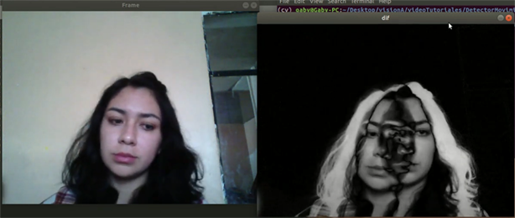


Lo que se obtiene es una imagen en escala de grises, pero conforme vamos moviendo se verá que la misma se divide en dos una quizás un poco mas blanca y es donde se está registrando el movimiento. Entonces esto no va a servir para poder transformar la imagen en blanco en imagen binaria.<br/>Para llevar adelante la transformación de la imagen de escala de grises a binaria se debe utilizar umbralización simple con `cv2.theshold()`. En los parámetros se debe poner el umbral, el color a detectar y un tipo de método, aquí sería conveniente utilizar umbral de 40; hay que tener en cuenta que cuando se está utilizando `cv2.THRESH_BINARY` para pixeles con valores mayores a 40 se va a asignar 255, es decir blanco, y menores a 40 se asigna 0 que sería al color negro.<br/>




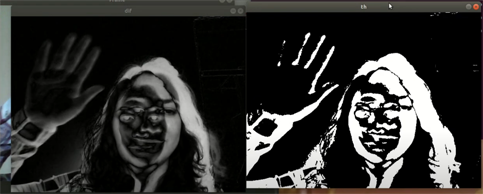


Como ya se tiene la imagen binaria es momento de aplicar el método `cv2.findContours()` (en OpenCV 3.4.4 devuelve tres valores y usamos el segundo) para poder encontrar los contornos correspondientes a las regiones en blanco de dicha imagen binaria. Para ello se está especificando en primer lugar `th` que es la imagen binaria y luego los contornos externos con `cv2.RETR_EXTERNAL` y `cv2.CHAIN_APPROX_EXTERNAL`.<br/>

Si se quiere dibujar o visualizar estos contornos se debe utilizar `cv2.drawContours()`<br/>

Si por caso se quiere dibujar dichos contornos uno por uno, se deberá usar un ciclo for, y el método `cv2.contourArea()` y devuelve el área en pixeles de cada contorno. Si esa área es mayor a 9000 entonces va a hacer un proceso de encerrar aquel contorno en un rectángulo, para ello se utiliza adentro del condicional el método `cv2.boundingRect()` que tenga un área mayor a 9000 pixeles (comparando el área con cierto valor se puede descartar valores pequeños por ejemplo, pero eso depende en realidad de cada aplicación). Recuerdese que la función `boundingRect()` devuelve cuatro valores, los ejes `x` `y` más el ancho `w` y alto `h` para poder encerrar en un rectángulo al contorno. Seguido a esto se va a utilizar el metodo `cv2.rectangle()` para poder visualizar con todos estos datos que se ha obtenido de la función anterior. Listo, ya se puede ir visualizando si el código detecta el movimiento en la imagen de la cámara.<br/>

Para tener en cuenta que si la reproducción se ve como acelerada, entonces se debe cambiar el `cv2.waitKey(1)` a `cv2.waitKey(30)`.<br/>

También es posible que las zonas con falta iluminación incida en la detección del objeto.<br/>

Vale aclarar además que una vez que ya esté corriendo el código no se deberá mover la cámara ya que el fondo ya fue capturado.<br/>

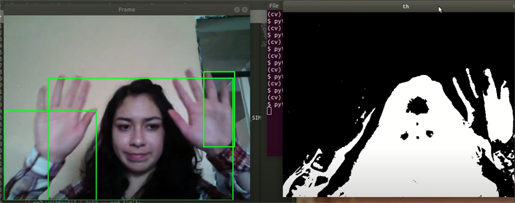



  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#Codigo base para hacer un stream de video

import cv2
import numpy as np

video = cv2.VideoCapture(0)

while True:
  ret, frame = video.read()
  if ret == False: break

  cv2.imshow('Frame', frame)
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

video.release()

In [ ]:
#Codigo para la deteccion de movimiento a traves de sustraccion de imagenes

import cv2
import numpy as np

video = cv2.VideoCapture(0) #Se puede remplazar por un video reemplazado el parametro con 'archivo.mp4'

i = 0

while True:
  ret, frame = video.read()
  if ret == False: break
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  if i == 20:
    bgGray = gray
  if i > 20:
    dif = cv2.absdiff(gray, bgGray)
    _, th = cv2.threshold(dif, 40, 255, cv2.THRESH_BINARY)
    _, cnts, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #cv2.drawContours(frame, cnts, -1, (0,255,0), 2)  #uasndo OpenCV 3.4.4 por ello los 3 valores (OpenCV 2 usar 2 valores)
    #cv2.imshow('dif', dif)
    cv2.imshow('th', th)
    for c in cnts:
      area = cv2.contourArea(c)
      if area > 9000:
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)


  cv2.imshow('Frame', frame)
  i += 1
  if cv2.waitKey(1) & 0xFF == ord('q'):  #Se puede reemplazar por cv2.waitKey(30)
    break

video.release()

<img src="https://cdn.jsdelivr.net/gh/homarr-labs/dashboard-icons/svg/jupyter.svg" width="30" height="30" alt="Jupyter Notebook"/> Jupyter Notebook: Adaptación del script

In [ ]:
#Detectar movimiento con OpenCV en un Jupyter Notebook
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Crear imagenes de ejemplo para simular la deteccion de movimiento
#Primero creamos una imagen base (fondo)
imagen_base = np.zeros((480, 640, 3), dtype=np.uint8)
imagen_base[:] = [100, 150, 200]                                     #color azul claro
cv2.rectangle(imagen_base, (100, 100), (200, 200), (0, 255, 0), -1)  #rectangulo verde

#Luego creamos una imagen con un objeto adicional (movimiento)
imagen_con_movimiento = imagen_base.copy()
cv2.circle(imagen_con_movimiento, (400, 200), 50, (0, 0, 255), -1)  #circulo rojo

#Convertir a escala de grises
gray_base = cv2.cvtColor(imagen_base, cv2.COLOR_BGR2GRAY)
gray_con_movimiento = cv2.cvtColor(imagen_con_movimiento, cv2.COLOR_BGR2GRAY)

#Calcular la diferencia absoluta entre las dos imágenes
dif = cv2.absdiff(gray_con_movimiento, gray_base)

#Aplicar umbral para resaltar las diferencias
_, th = cv2.threshold(dif, 40, 255, cv2.THRESH_BINARY)

#Encontrar contornos
cnts, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Dibujar rectangulos alrededor de los contornos que superen un area minima
frame_resultado = imagen_con_movimiento.copy()

for c in cnts:
    area = cv2.contourArea(c)
    if area > 9000:                                                #Umbral de area para considerar movimiento
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(frame_resultado, (x, y), (x + w, y + h), (0, 255, 0), 2)

#Mostrar las imagenes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(cv2.cvtColor(imagen_base, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Imagen Base (Fondo)')
axes[0, 0].axis('off')

axes[0, 1].imshow(cv2.cvtColor(imagen_con_movimiento, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Imagen con Movimiento')
axes[0, 1].axis('off')

axes[0, 2].imshow(dif, cmap='gray')
axes[0, 2].set_title('Diferencia Absoluta')
axes[0, 2].axis('off')

axes[1, 0].imshow(th, cmap='gray')
axes[1, 0].set_title('Umbral (Detección de Movimiento)')
axes[1, 0].axis('off')

axes[1, 1].imshow(cv2.cvtColor(frame_resultado, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Resultado con Rectángulos de Movimiento')
axes[1, 1].axis('off')

#Mostrar imagen original con movimiento resaltado
axes[1, 2].imshow(cv2.cvtColor(imagen_con_movimiento, cv2.COLOR_BGR2RGB))
axes[1, 2].set_title('Imagen Original con Movimiento')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

#Mostrar informacion sobre el proceso
print(f'Número de contornos detectados: {len(cnts)}')
areas = [cv2.contourArea(c) for c in cnts if cv2.contourArea(c) > 9000]
print(f'Áreas de contornos significativos: {areas}')

Aquí tampoco se puede usar cámaras en tiempo real ni bucles `while True` en un **Jupyter Notebook**, por ello se crearán ejemplos que usen imágenes estáticas para demostrar la detección de movimiento mediante sustracción de imágenes.<br/>
Para la detección del movimiento se simula este efecto a través de la creación de dos imágenes: una base y otra con un objeto adicional. Se calcula a continuación la diferencia absoluta entre las dos imágenes para detectar cambios. Además se puede ajustar los valores de umbral y área mínima según las necesidades del usuario.

#[**Ropa Invisible con OpenCV**](https://www.youtube.com/watch?v=fR7IQQJJAnk&list=PLBg7GSvtrU2MOLWM0bGU1_FT3LsJPyY-5&index=22)

En este apartado se procederá a realizar un código en **Python** para hacer que la ropa se vea invisible con **OpenCV**.<br>

La prenda de vestir será luego invisibilizada según su color, que puede ser rojo, verde, azul, amarillo o cualquier otro color. El algoritmo buscará, identificará ese color y lo sustraerá para hacerlo invisible, mostrándose en su lugar el fondo.<br/>

Para esto se usará la detección de colores con **OpenCV**. Es conveniente ir probando varios rangos de HSV hasta obtener los más adecuados según la iluminación del lugar.<br/>

Luego se pasa a transformar el video de BGR a HSV con el método `cv2.cvtColor()` incorporandole el frame como primer argumento y `cv2.COLOR_BGR2HSV` como segundo parámetro.<br/>

A continuación se va a buscar los rangos del color, especificado con anterioridad, utilizando el método `cv2.inRange()` pasándole la variable del frame convertido a HSV `frameHSV` como primer argumento, y los puntos de paso de rango altos y bajo como segundo y tercer argumento.<br/>

Si se prueba ver la imagen hasta este punto se observará que aparece una imagen binaria con la ropa del color indicado en blanco, pero también hay otras áreas blancas en el fondo generando ruido no deseado, nuestro trabajo será entonces eliminar la mayor parte posible de dicho ruido.<br/>

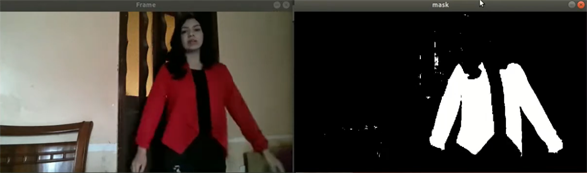

Para eliminar este ruido se utiliza el método `cv2.medianBlur()` que es un filtro lineal para aplicaciones de imágenes. Con esto se ha logrado que las áreas blancas de ruido de fondo se han ido, y además se ha conseguido que los bordes de la ropa de color se encuentren más uniformes y mejor definidos.<br/>

Dado que ya se ha obtenidio una imagen binaria donde la región en blanco es representa al color indicado y el negro la no presencia de dicho color, se necesita ahora que en el área blanca se vea el fondo de la escena. Luego se procede a invertir la imagen binaria para obtener todo el video a color, a exepción de donde están las prendas con el color negro que va a ser invisible. Una vez que se obtiene estas dos imágenes se deben unirlas para obtener el efecto de invisibilidad.<br/>    

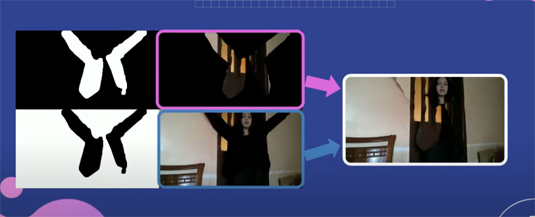


Vamos a ir adelantando el registro del fondo o background. Para esto vamos a inicializar una variable llamada `bg` y tendrá `None` como valor. Luego dentro del ciclo while, agregamos un condicional que dice que si `bg` es igual a `None` entonces que almacene `frame`, o sea se reeplace por el fondo, ya que `frame` correspondería a la primera imagen del video. Este efecto funcionará si la primera imagen no están las personas con las prendas ni nada del color indicado, y luego ya pueden aparecer dentro de la imagen y verán elefecto, pero ahora debemos continuar con el código.<br/>

Ahora que tenemos esta imagen binaria `mask`, nuestro objetivo será que en vez de la prenda de color se vea el fondo de la imagen, para ello usaremos el método `cv2.bitwise_and()`.

Como ya dijimos, para completar el efecto necesitaremos de una imagen de fondo que es el brackground `bg` y se lo damos a `bitwise()` en sus dos primeros argumentos y luego `mask` que corresponde al color indicado como tercer argumento, y almacenamos todo esto en una variable llamada `areaColor`.<br/>

Vemos tres ventanas de imágenes, `frame`, `areaColor` y `mask`. Hemos obtenido que en el área donde estaba la prenda de color ahora esta el fondo.<br/>

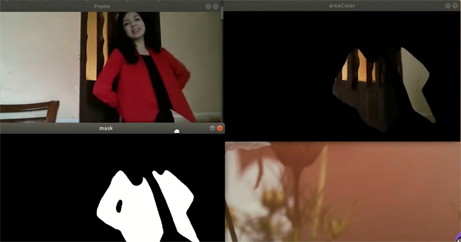

<br/>Ahora invertimos `mask` y lo almacenamos en una variable `maskInv`, para lo cual aplicamos `cv2.bitwise_not()`, y obtendremos que en vez de las áreas que antes aparecian en blanco ahora se muestran en negro y viceversa. Esto nos servirá para que todo lo que no corresponda a la prenda de vestir se visualice normalmente.<br/>

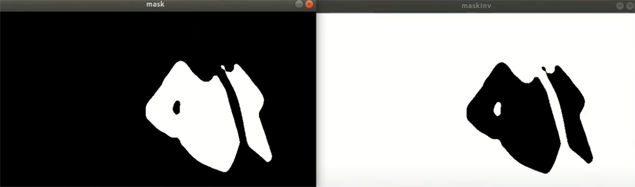


Se aplica ahora `cv2.bitwise_and()` pero esta vez se le va a especificar como argumentos a frame, frame y la máscara invertida.<br/>

El último paso para obtener el efecto de invisibilidad será sumar estas dos imágenes con `cv2.addWeighted()` que se almacenará en la variable `finalFrame`. Y además se le va a agregar el método de **Numpy** `np.ones()` y luego `cv2.dilate()` para darle más dilatación y que no se noten los bordes de la prenda de color.<br/>


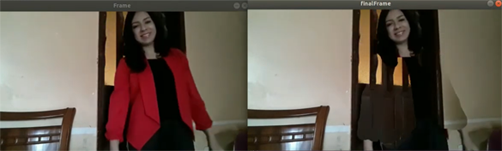



### -- Más información en el [Blog de OMES](https://omes-va.com/ropa-invisible-opencv-y-python/) --

  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#Ropa invisible con OpenCV

import cv2
import numpy as np

#Capturamos el video
cap = cv2.VideoCapture('videoCam.mp4')
bg = None

#Para color rojo
rojoBajo1 = np.array([0,140,90], np.uint8)
rojoAlto1 = np.array([8,255,255], np.uint8)
rojoBajo2 = np.array([170,140,90], np.uint8)
rojoAlto2 = np.array([180,255,255], np.uint8)

#Procesamiento de la imagen segun los metodos aplicados
while True:

  ret, frame = cap.read()
  if ret == False: break

  if bg == None:
    bg = frame

  #Detectando el color rojo, mascaras
  frameHSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
  maskRojo1 = cv2.inRange(imageHSV, rojoBajo1, rojoAlto1)
  maskRojo2 = cv2.inRange(imageHSV, rojoBajo2, rojoAlto2)
  mask = cv2.add(maskRojo1, maskRojo2)
  mask = cv2.medianBlur(mask, 13)

  kernel = np.ones((5,5), np.uint8)
  mask = cv2.dilate(mask, kernel, iterations=2)

  areaColor = cv2.bitwise_and(bg, bg, mask=mask)
  maskInv = cv2.bitwise_not(mask)
  sinAreaColor = cv2.bitwise_and(frame, frame, mask=maskInv)
  finalFrame = cv2.addWeighted(areaColor, 1, sinAreaColor, 1, 0)
  cv2.imshow('Frame', frame)
  #cv2.imshow('Mask', mask)
  #cv2.imshow('Mask', mask)
  #cv2.imshow('sinAreaColor', sinAreaColor)
  cv2.imshow('finalFrame', finalFrame)


  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

cap.release()

<img src="https://cdn.jsdelivr.net/gh/homarr-labs/dashboard-icons/svg/jupyter.svg" width="30" height="30" alt="Jupyter Notebook"/> Jupyter Notebook: Adaptación del script

In [ ]:
#Simulacion de ropa invisible con OpenCV en un Jupyter Notebook
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Crear imagenes de ejemplo para simular el efecto de "ropa invisible"
#Imagen de fondo (sin el objeto rojo)
bg = np.zeros((480, 640, 3), dtype=np.uint8)
bg[:] = [100, 150, 200]
cv2.rectangle(bg, (100, 100), (200, 200), (255, 255, 255), -1)        #rectangulo blanco

#Imagen con objeto rojo (simulando la "ropa")
frame = bg.copy()
cv2.circle(frame, (300, 200), 80, (0, 0, 255), -1)                     #circulo rojo (la "ropa")

#Definir rangos de color rojo en HSV
rojoBajo1 = np.array([0, 140, 90], dtype=np.uint8)
rojoAlto1 = np.array([8, 255, 255], dtype=np.uint8)
rojoBajo2 = np.array([170, 140, 90], dtype=np.uint8)
rojoAlto2 = np.array([180, 255, 255], dtype=np.uint8)

#Convertir el frame a HSV
frameHSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#Detectar el color rojo, mascaras
maskRojo1 = cv2.inRange(frameHSV, rojoBajo1, rojoAlto1)
maskRojo2 = cv2.inRange(frameHSV, rojoBajo2, rojoAlto2)
mask = cv2.add(maskRojo1, maskRojo2)
mask = cv2.medianBlur(mask, 13)

#Dilatar la mascara para mejorar la deteccion
kernel = np.ones((5, 5), np.uint8)
mask = cv2.dilate(mask, kernel, iterations=2)

#Aplicar la mascara al fondo y al frame original
areaColor = cv2.bitwise_and(bg, bg, mask=mask)
maskInv = cv2.bitwise_not(mask)
sinAreaColor = cv2.bitwise_and(frame, frame, mask=maskInv)
finalFrame = cv2.addWeighted(areaColor, 1, sinAreaColor, 1, 0)

#Mostrar las imagenes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(cv2.cvtColor(bg, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Imagen de Fondo')
axes[0, 0].axis('off')

axes[0, 1].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Imagen con Objeto Rojo ("Ropa")')
axes[0, 1].axis('off')

axes[0, 2].imshow(mask, cmap='gray')
axes[0, 2].set_title('Máscara de Color Rojo')
axes[0, 2].axis('off')

axes[1, 0].imshow(cv2.cvtColor(areaColor, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Área de Color Rojo en Fondo')
axes[1, 0].axis('off')

axes[1, 1].imshow(cv2.cvtColor(sinAreaColor, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Imagen Original sin Área Roja')
axes[1, 1].axis('off')

axes[1, 2].imshow(cv2.cvtColor(finalFrame, cv2.COLOR_BGR2RGB))
axes[1, 2].set_title('Imagen Final ("Ropa Invisible")')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

No es posible en un **Jupyter** mostrar cámaras en tiempo real ni bucles `while True`, por ello se crea un ejemplo que use imágenes estáticas para demostrar el efecto de "ropa invisible".<br/>
Se usan subplots para la visualización de la imagen de fondo, la imagen con objeto rojo, la máscara de color rojo, el área de color rojo en el fondo, la imagen original sin área roja y la imagen final con el efecto de "ropa invisible".<br/>
El efecto de "ropa invisible" se simula, desarrollando un efecto visual con la interposición de una imagen de fondo y una imagen con un objeto rojo. Se detecta el color rojo en la imagen con objeto rojo y se aplica una máscara para "eliminarlo" y reemplazarlo con el fondo. Se puede finalmente ajustar los valores de los rangos de color rojo y el tamaño de la máscara.

#[**Contando Dedos con OpenCV**](https://www.youtube.com/watch?v=nVkX7wC25g4&list=PLBg7GSvtrU2MOLWM0bGU1_FT3LsJPyY-5&index=28)

Para poder contar los dedos de la mano con **OpenCV** se utilizará la sustracción de imágenes, por lo cuál será muy conveniente elegir un fondo neutro o en el que se pueda destacar la mano, así como procurar lugares con una buena iluminación. Claro que para lograr el mismo objetivo se puede utilizar otras técnicas como el entrenamiento de modelos de Machine Learning, la sustitución de fondo o la deteccion del color de la piel. En la práctica que se llevará ahora a cabo pretende abarcar gran parte de todo lo aprendido ya en **OpenCV** básico y así reforzamo conocimientos.<br/>

Bien, se arranca importando **OpenCV**, **Numpy** e **Imutils**.<br/>

Primero capturar un video con **OpenCV**.<br/>

Y luego en una variable `bg` se va a darle el valor `None` que va a servir para hacer sustracción entre la imagen del fondo y la imagen en primer plano.<br/>

Luego se declara varios colores a usar únicamente al momento de la visualización de los distintos datos.<br/>

Luego se realiza un ciclo while, en el que se va a mostrar los fotogramas o imágenes que se capturaron.<br/>

A continuación y dentro del ciclo while se programa para que espere entre fotogramas con `cv2.waitKey()` y se le da 20 como valor, ya que si se le da 1 como valor seguramente sea muy rápido.<br/>

Fuera del ciclo while se hace el lanzamiento del video con `cap.release()`<br/>

Hasta aquí se ve el video y la distinción de la mano pero aún sin el efecto de contar los dedos.<br/>

Si el video queda muy grande se lo puede redimensionar con `imutils()` dentro del ciclo while, dándole como argumento el frame y el ancho deseado.<br/>

Para continuar desarrollando el efecto se necesita hacer un **efecto espejo** y se realiza con `cv2.flip()` dándole a `frame y` 1 como argumentos.<br/>

Luego se hace una copia de frame que va a ayudar a poder capturar el fondo de la escena, esto se realiza con el método `cv2.copy()` y se almacena el método en una variable llamada `frameAux`.<br/>

A continuación se realiza un condicional en donde se almacena el fondo de la escena con el método `cv2.cvtColor()` al que le damos dicho fondo de la imagen y se almacena en la variable `bg` que será nuestro fondo en adelante cuando el usuario presione la *tecla i*.<br/>
Al condicional anterior le debe preceder otro condicional que confirme si se está guardando la imagen de brackground y se visualiza con `cv2.imshow`.<br/>

Es importante al momento de guardar el fondo asegurarse que la mano esté contrastando con el fondo.<br/>
Y siempre recordar de presionar para saber que se está tomando el fondo.<br/>

A continuación se va a establecer una región de interés. Se considera una porción de la imagen contenida en el frame, para trabajar en está con `frame[50:300,380,600]` y se almacena en la variable `ROI`. ROI significa Region Of Intern. Se crea luego un rectángulo con `cv2.rectangle()`. El -2 que se le aplica a los argumentos del código es solamente para que el rectángulo sea un poquito más grande que la región de interés, se hace esto sólo para visualizar.<br/>

Ahora se va a transformar esta región de interés a escala de grises con `cv2.cvtColor()` y dándole como argumentos a `ROI` y a `cv2.COLOR_BGR2GRAY`<br/>

Y también se va a necesitar que el background `bg` también esté en escala de grises así que por lo tanto se va a repetir el mismo proceso para `bg` con la misma porción de la imagen de `frame[50:300, 380:600]`. Y si se quiere visualizarlo todo se debe utilizar las tres línea de código siguientes:<br/> `cv2.imshow('ROI', ROI)` ,<br/> `cv2.imshow('dif', dif)` ,<br/> `cv2.imshow('th', th)`.<br/> No hay que olvidar de presionar la *tecla i*. De este modo se visualiza la diferenciación del primer plano y el fondo.<br/>

Se pasa ahora a la sustracción. Para esto se va a comenzar por restar grayROI a bgROI a través de la siguiente línea `dif = cv2.absdiff('grayROI', 'bgROI')` con esto se va a diferenciar el primer plano del fondo.<br/>

Luego se va aplicar umbralización simple a través de `threshold()`, aquí la imagen de entrada será la variable `dif` y la opción de argumento será `THRESH_BINARY`. Lo que se obtendrá es a las imágenes de bgROI para el fondo, grayROI para el primer plano y th para la umbralización.   





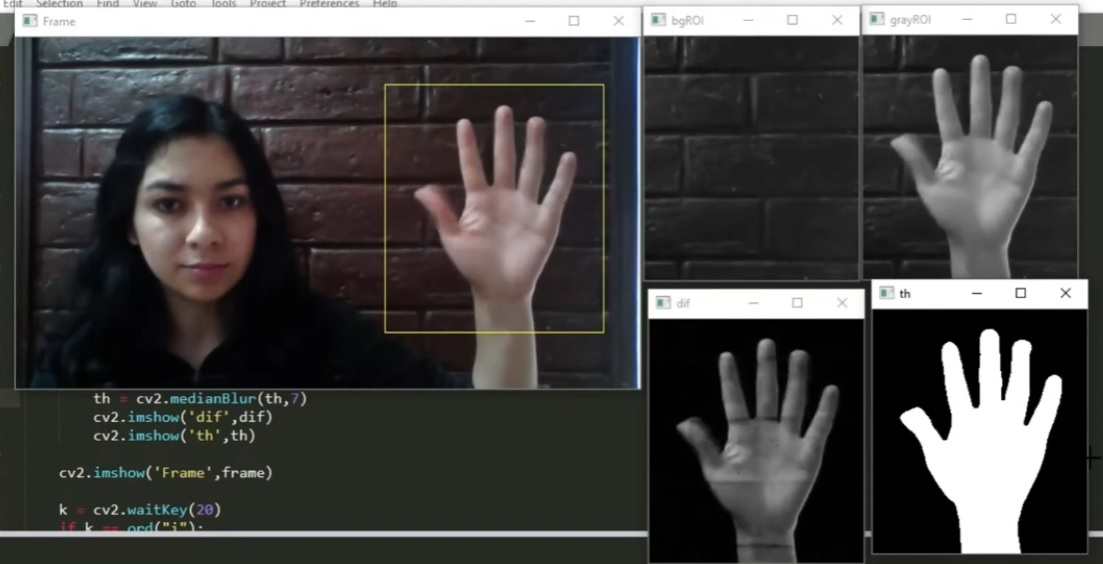


bgROI para el fondo de la imagen, en grayROI es el primer plano de la imagen, en dif está la resta de los dos anteriores y finalmente en th que es la imagen binarizada. Esta última es la más importante ya que es la que va a ayudar a obtener la cuenta de los dedos. Para mejorar la imagen bonarizada se le puede aplicar `th = cv2.medianBlur(th,7)` para que la imagen binarizada sea más suavizada.<br/>
Ahora lo que se necesita hacer es encontrar los contornos de la imagen con el método `cv2.findCountours()`, cuyos argumentos son th, cv2.RETR_EXTERNAL, cv2.CHAIN_APROX_SIMPLE. La variable resultante son dos o sea  cnts, _ ; pero si es que salta un error, se puede cambiar por _ , cnts, _ es decir con tres variables resultantes.<br/>
Luego se ordena los contornos de mayor a menor según el área, y se quiere obtener el control más apto. De este modo se verá que se obtiene el contorno de la mano; en este caso en una línea verde al rededor de la mano.<br/>


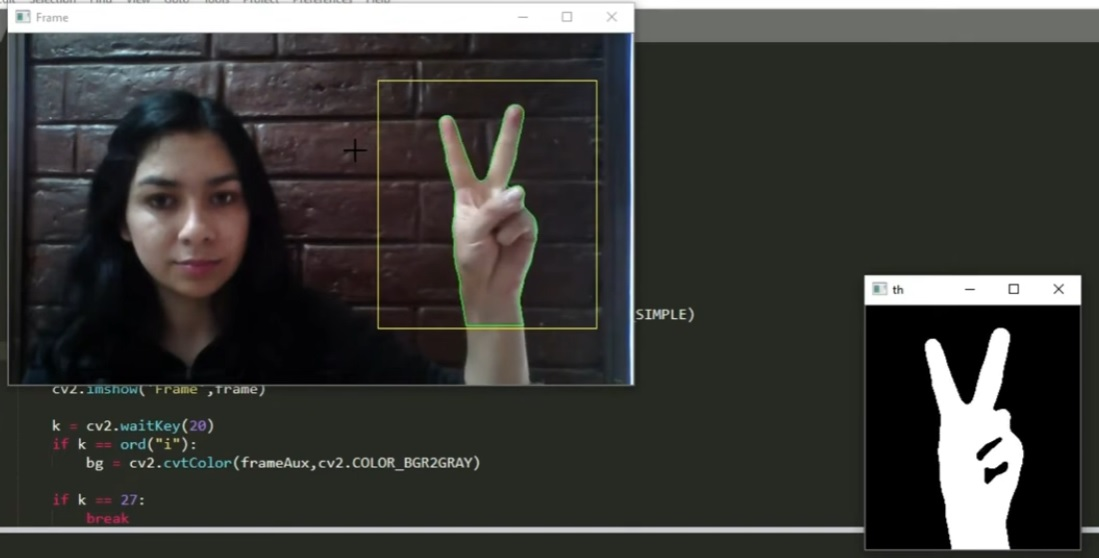

Ahora para manejar el contorno se va a hacer un for, y lo que se quiere es obtener el centro del contorno y el punto más alto del controrno, esto va a servir para saber cuando un solo dedo está levantado. En la pantalla se verá un punto verde para el centro y el punto naranja para el punto más alto como resultado de estas líneas de código.<br/>


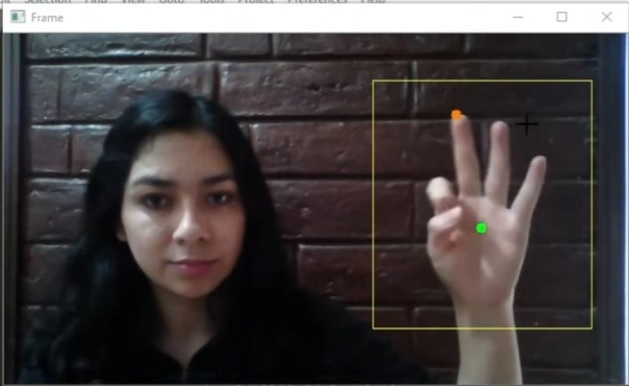

Bien, ahora `cv2.convexHull` será el método que utiliza **OpenCV** para construir un casco convexo o convex hull que rodee un objeto y que por lo tanto permite crear una línea verde que se puede ver en la imagen creando un efecto de banda elásticas al rededor del objeto. Además ayudará a determinar los efectos de convexidad de dicho objeto. El resultado de los parámetros serán las coordenadas del casco convexo, dichos parámetros son:
- `point`, que es el contorno encontrado
- `returnsPoint`, por default es True y se lo utiliza para dibujar, mientras que si es False devolverá los índices de los puntos del casco convexo lo que permitirá encontrar los defectos de convexidad.  



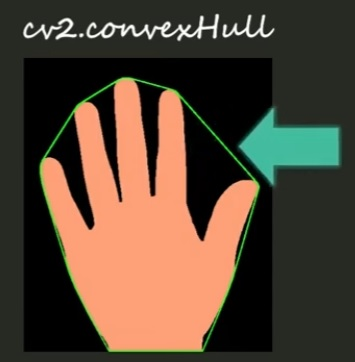

Ahora se va a mencionar a los defectos de convexidad, si se ve la figura se advertirá que hay zonas o áreas en donde la línea no está tocando la mano. Todas esas cavidades son consideradas defectos de convexidad, que son desviaciones máximas locales. Para corregir esto se utilizará `cv2.convexityDefects`. Entonces una vez que se ha calculado el casco convexo y se obtiene False en vez de True point, se va a aplicar está función y se obtendrá los defectos de convexidad. Los parámetros que utiliza la función son el contorno de entrada y el casco convexo o convexHull, y cuyo parámetro return points debió estar en False. De esta función se obtendrán un array, en donde cada columna tendrá el punto inicial, el punto final, el punto más alejado y además la distancia aproximada al punto más alejado.

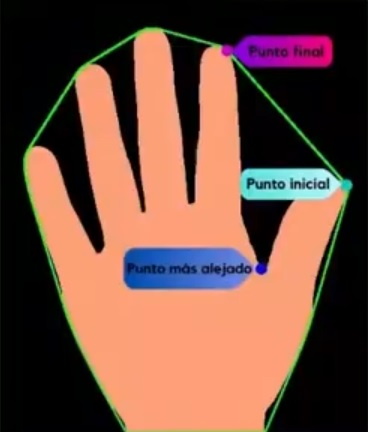

Ahora bien, puede que se dé el caso que no se tenga áreas convexas pero por si hay áreas convexas se realiza el siguiente condicional. Desempaquetando toda la información que se obtiene de todos los defectos a través de un condicional `if defects is not None:`. En este bloque de código se tiene a las dos primeras variables que son para ayudar a visualizar cada número en cada letra, además se encuentra la variable `fingers` que va a ser el contador de los números según los dedos levantados. Lo que se obtiene a continuación con todo el bloque de código son un montón de puntos en la imagen en donde cada color va a representar el punto inicial, el punto final y el punto más alejado. Entonces se va a necesitar filtrarlos, el primer aspecto a considarar es la distancia entre el punto inicial y el punto final. Si esa distancia es muy pequeña, entonces se va a descartar esos punto o esos defectos convexos. Con `if np.linalg.norm(star-end) > 20` se calcula la distancia entre los puntos start y end.


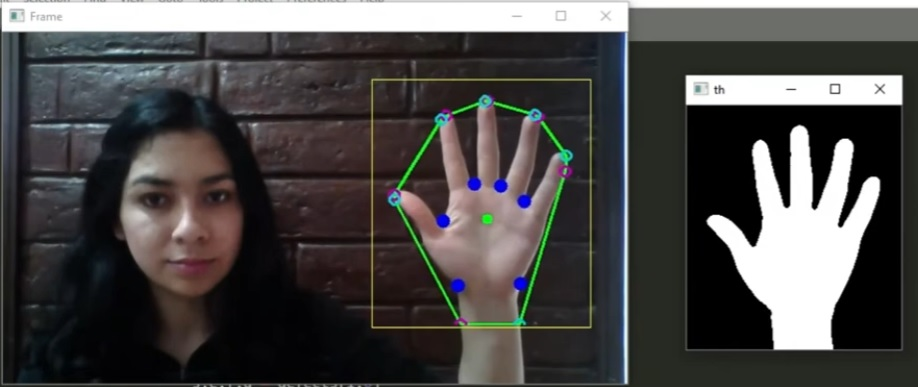


Puede anotarse también la distancia al punto más alejado. En este caso ya no es un punto sino una distancia, y por eso no se puede notar en el Frame ya que no tiene coordenadas, sin embargo se le puede poner un texto. Esto se va a hacer como el punto más alejado en `tuple(far)` lo que dará las distancias en números en el Frame. Probando con varios códigos, dió mejores resultados es reeplazando la siguiente línea de código: `if np.linalg.norm(star-end) > 20 and d > 12000` . Esto va a organizar la lectura de las distancias. Funciona bien pero a veces da algunos problemas cuando se dobla los dedos o con distancias intermedias por ello es conveniente agregar un aspecto al código como lo es el angulo que forma el punto inicial y el punto final y el punto más alejado, y se ve en la figura a continuación.<br/>
Los puntos son:<br/>
`a = np.linalg.norm(far-end)` <br/>
`b = np.linalg.norm(far-star)` <br/>
`c = np.linalg.norm(star-end)` <br/>

Correspondientes al punto inicial, al punto final y a la longitud. Con esto se calcula los lados del triángulo con ayuda de la distancia entre los dos puntos.

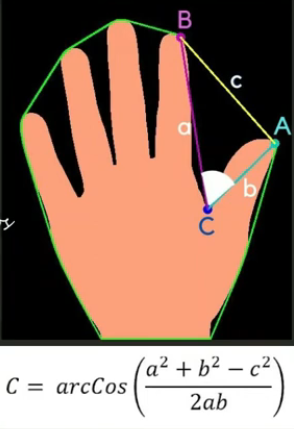

Entonces para calcular el ángulo se va a necesitar el arco coseno `angulo = arccos()`, ahora este ángulo se va a presentar en radiales por lo cual se va a usar la función de **Numpy** `np.degree()`. Y además se tiene que hacer que se devuelva en valores con `int()`.<br/>
Por supuesto que el ángulo más grande que se tiene está entre el dedo pulgar y el índice, el cual será de 90° como límite y se lo especifica al código. Finalmente se lo va a agregar a la línea condicional:<br/>
`if np.linalg.norm(star-end) > 20 and d > 12000 angulo < 90` <br/>

A continuación y dentro del condicional, se va a almacenar todos los puntos en las listas vacias previamente creadas `inicio = []` `fin = []` , Esto se hace para luego visualizar cada uno de los dedos que están levantados.<br/>

Queda solamente un bloque de código para cuando se levante un solo dedo, ya que no va a tener ningún ángulo, eso se aclara con `if len(inicio) == 0` es cero porque no se ha almacenado nada, ningún ángulo, entre el punto más alto del contorno y el punto del centro del contorno. Un valor a recomendar es el de 110 de ángulo en el minY pero es algo que se tiene que ensayar según el caso para que detecte que hay un dedo levantado.<br/>

Muy bien, y ahora para calcular cuando se levantan más dedos en el Frame se va a utilizar los valores que habíamos almacenado en `inicio = []` . En el último loop `for i in range(inicio)` -y se pone inicio porque va a ver la misma cantidad en inicio como en fin- y a continuación un contar para los dedos en la variable fingers.<br/>
Finalmente se va a destacar los números del conteo con `cv2.putText()` reemplazando a ***ROI*** por ***frame***.<br/>

Notese que la imagen binaria es lo más importante, ya que si no se tuviera una buena imagen binaria el código no podría identificar los cambios en la imagen y por lo cual no se produciría el conteo, tal como se ven en la imagen a continuación.

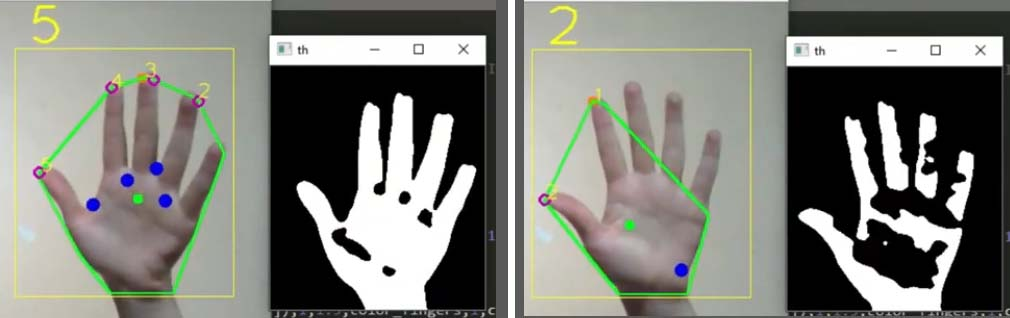

  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#Contando los dedos de la mano

import cv2
import numpy as np
import imutils

#cap = cv2.VideoCaprure(0,cv2.CAP_DSHOW)
cap = cv2.VideoCapture('videoFaces.mp4')
bg = None

#Colores para visualizacion
color_start = (204,204,0)
color_end = (204,0, 204)
color_far = (255,0,0)

color_start_far = (204,204,0)
color_far_end = (204,0, 204)
color_star_end = (255,0,0)

color_contorno = (0,255,0)
color_ymin = (0,130, 255)      #punto mas alto del contorno
color_angulo = (0, 255, 255)
color_d = (0, 255, 255)
color_fingers = (0, 255, 255)

while True:

  ret, frame = cap.read()
  if ret == False: break

  frame = imutils.resize(frame, width=640)
  frame = cv2.flip(frame,1)   #efecto espejo
  frameAux = frame.copy()     #copia para poder capturar el fondo de la escena

  if bg is not None:
    #cv2.imshow('bg', bg)

    ROI = frame[50:300,380:600]
    cv2.rectangle(frame, (380-2, 50-5), (600+2, 300+2), color_fingers, 1)
    grayROI = cv2.cvtColor(ROI, cv2.COLOR_BGR2GRAY)

    bgROI = bg[50:300,380:600]
    #cv2.imshow('ROI', ROI)
    #cv2.imshow('grayROI', grayROI)
    #cv2.imshow('bgROI', bgROI)

    dif = cv2.absdiff(grayROI, bgROI)
    _, th = cv2.threshold(dif, 30, 255, cv2.THRESH_BINARY)
    th = cv2.medianBlur(th, 7)
    #cv2.imshow('dif', dif)
    cv2.imshow('th', th)

    cnts,_ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #si da error se puede cambiar a _,cnts,_
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:1]
    #cv2.drawContours(ROI, cnts, 0, (0,255,0), 1)

    for cnt in cnts:

      M = cv2.moments(cnts)

      if M["m00"] == 0: M["m00"] = 1
      x = int(M["m10"] / M["m00"])
      y = int(M["m01"] / M["m00"])
      cv2.circle(ROI,(x,y),5,(0,255,0),-1)

      ymin = cnt.min(axis=1)
      cv2.cicle(ROI,tuple(ymin[0]),5,color_ymin,-1)

      hull1 = cv2.convexHull(cnt)  #casco convexo
      cv2.drawContours(ROI, [hull1], 0, color_contorno, 2)

      hull2 - cv2.convexHull(cnt, returnPoints=False)  #devuelve un array con [punto inicial, punto final, punto mas alejado, distancia aprox]
      defects = cv2.convexityDefects(cnt, hull2)

      if defects is not None:

        inicio = []
        fin = []
        fingers = 0

        for i in range(defects.shape[0]):
          s, e, f, d = defects[i, 0]
          start = cnt[s][0]
          end = cnt[e][0]
          far = cnt[f][0]

          a = np.linalg.norm(far-end)
          b = np.linalg.norm(far-star)
          c = np.linalg.norm(star-end)

          angulo = np.arccos((np.power(a,2) + np.power(b,2) - np.power(c,2)) / (2*b*c))
          angulo = np.degrees(angulo)
          angulo = int(angulo)

          if np.linalg.norm(start - end) > 20 and d > 12000 and angulo < 90:  #distancia entre dos puntos
            inicio.append(start)
            fin.append(end)
            #cv2.putText(ROI, '{}'.format(d), tuple(far), 1, 1, color_d, 1, cv2.LINE_AA)
            cv2.circle(ROI, tuple(start), 5, color_start, 2)
            cv2.circle(ROI, tuple(end), 5, color_end, 2)
            cv2.circle(ROI, tuple(far), 7, color_far,2)

        if len(inicio) == 0:
          minY = np.linalg.norm(ymin[0]-x,y])
          if minY >= 110:
            fingers = fingers +1
            cv2.putText(ROI, '{}'.format(fingers), tuple(ymin[0]), 1, 1, color_fingers, 1, cv2.LINE_AA)

        for i in range(len(inicio)):
          fingers = fingers +1
          cv2.putText(ROI, '{}'.format(fingers), tuple(inicio[i]), 1, 1, color_fingers, 1, cv2.LINE_AA)
          if i == len(inicio)-1:
            fingers = fingers +1
            cv2.putText(ROI, '{}'.format(fingers), tuple(fin[i]),1,1, color_fingers, 1, cv2.LINE_AA)


        cv2.putText(frame, '{}'.format(fingers), tuple(390,45), 1, 4, color_fingers, 2, cv2.LINE_AA)



  cv2.imshow('Frame', frame)

  k = cv2.waitKey(20)
  if k == ord("i"):
    bg = cv2.cvtColor(frameAux, cv2.COLOR_BGR2GRAY)

  if k == 27:
    break

cap.release()
cv2.destroyAllWindows()


<img src="https://cdn.jsdelivr.net/gh/homarr-labs/dashboard-icons/svg/jupyter.svg" width="30" height="30" alt="Jupyter Notebook"/> Jupyter Notebook: Adaptación del script

In [ ]:
#Contar los dedos de la mano con OpenCV en Jupyter Notebook
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Crear una imagen de ejemplo para simular el conteo de dedos
imagen = np.zeros((480, 640, 3), dtype=np.uint8)
imagen[:] = [100, 150, 200]                                       #color azul claro
cv2.rectangle(imagen, (380, 50), (600, 300), (255, 255, 255), 2)  #region de interes (ROI)

#Dibujar una mano con 3 dedos levantados
cv2.circle(imagen, (450, 150), 50, (0, 255, 0), -1)       #palma de la mano
cv2.line(imagen, (450, 150), (450, 50), (0, 255, 0), 10)   #dedo 1
cv2.line(imagen, (450, 150), (400, 100), (0, 255, 0), 10)  #dedo 2
cv2.line(imagen, (450, 150), (500, 100), (0, 255, 0), 10)  #dedo 3

#Extraer la region de interes (ROI)
ROI = imagen[50:300, 380:600]
grayROI = cv2.cvtColor(ROI, cv2.COLOR_BGR2GRAY)

#Aplicar umbral para resaltar la mano
_, th = cv2.threshold(grayROI, 100, 255, cv2.THRESH_BINARY)
th = cv2.medianBlur(th, 7)

#Encontrar contornos
cnts, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:1]

#Dibujar contornos y contar dedos
for cnt in cnts:
    M = cv2.moments(cnt)
    if M["m00"] == 0:
        M["m00"] = 1
    x = int(M["m10"] / M["m00"])
    y = int(M["m01"] / M["m00"])
    cv2.circle(ROI, (x, y), 5, (0, 255, 0), -1)

    #Encontrar el punto mas alto del contorno
    ymin = tuple(cnt[cnt[:,:,1].argmin()][0])
    cv2.circle(ROI, ymin, 5, (0, 130, 255), -1)

    #Calcular el casco convexo
    hull1 = cv2.convexHull(cnt)
    cv2.drawContours(ROI, [hull1], 0, (0, 255, 0), 2)

    #encontrar defectos de convexidad
    hull2 = cv2.convexHull(cnt, returnPoints=False)
    defects = cv2.convexityDefects(cnt, hull2)

    if defects is not None:
        fingers = 0
        for i in range(defects.shape[0]):
            s, e, f, d = defects[i, 0]
            start = tuple(cnt[s][0])
            end = tuple(cnt[e][0])
            far = tuple(cnt[f][0])

            #Calcular angulo
            a = np.linalg.norm(np.array(far) - np.array(end))
            b = np.linalg.norm(np.array(far) - np.array(start))
            c = np.linalg.norm(np.array(start) - np.array(end))

            angle = np.arccos((a**2 + b**2 - c**2) / (2*a*b))
            angle = np.degrees(angle)
            angle = int(angle)

            #Contar dedos
            if np.linalg.norm(np.array(start) - np.array(end)) > 20 and d > 12000 and angle < 90:
                cv2.circle(ROI, start, 5, (204, 204, 0), 2)
                cv2.circle(ROI, end, 5, (204, 0, 204), 2)
                cv2.circle(ROI, far, 7, (255, 0, 0), 2)
                fingers += 1

        #Dibujar numero de dedos
        cv2.putText(ROI, f'{fingers}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

#Mostrar las imagenes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Imagen Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(grayROI, cmap='gray')
axes[0, 1].set_title('ROI en Escala de Grises')
axes[0, 1].axis('off')

axes[1, 0].imshow(th, cmap='gray')
axes[1, 0].set_title('ROI Umbralizada')
axes[1, 0].axis('off')

axes[1, 1].imshow(cv2.cvtColor(ROI, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('ROI con Contornos y Dedos Detectados')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print(f'Número de dedos detectados: {fingers}')

Para esta adapatación para **Jupyter** se crearán ejemplos que usen imágenes estáticas para demostrar el conteo de dedos de la mano, ya que como en los casos anteriores no es posible contar con registro de cámara streaming en Jupyter.<br/>
Para la visualización que se lleva a cabo con **Matplotlib**, se usarán subplots y de este modo mostrar la imagen original, la ROI en escala de grises, la ROI umbralizada y la ROI con contornos y dedos detectados.<br/>
El conteo de dedos es a través de una simulación, es decir que el conteo de los dedos se lleva a cabo con la imagen de una mano cuyos dedos estan levantados y luego algunos dedos no están levantados. Por eso es una simulación.<br/>
Es importante considerar los defectos de convexidad para contar los dedos.


#[**Detección de Rostros**](https://www.youtube.com/watch?v=J1jlm-I1cTs&list=PLBg7GSvtrU2MOLWM0bGU1_FT3LsJPyY-5&index=22)


En este apartado se va a programar para detectar rostros con **Haar Cascades Python** y **OpenCV**.<br/>La detección de rostros es un técnica que permite detectar en una imagen el rostro de una o varias personas mientras que ignora el fondo de la imagen u otros objetos que estén dentro de dicha imagen. Esto está presente en muchas aplicaciones que se usan en el día a día, por ejemplo para detectar el rostro cuando se toma una fotografía o bien en las redes sociales detectan el rostro y nos piden etiquetar a esa persona, así también en las aplicaciones de los bancos para asegurar la identidad de la persona que está operando, o sino en las aplicaciones lúdicas de Inteligencia Artificial que detectan el rostro y luego se le aplican deformaciones graciosas.<br/>La forma en la que hoy en día se lleva a cabo la tarea de detección de rostro es a través de Machine Learning. En un principio se necesitaban una gran cantidad de imágenes para entrenar a un clasificador, para que este algoritmo pueda aprender entre la presencia de un rostro o no según los objetos o formas en la imagen. Para este proceso se requieren
1. un gran número de **"imágenes positivas"** que poseen rostros y un monton de **"imágenes negativas"** que no poseen un rostro.
2. Luego se procederá a la **"extracción de características"** de todas estas imágenes.
3. Emplear un **enfoque de Machine Learning** y proceder con el **entrenamiento del algoritmo**.
4. Finalmente se podrá tener un **clasificador**.

Para este caso, en el segundo paso, en la extracción de características es realizada con características de Haar. Mientras que en el tercer paso, para entrenar al clasificador se usa una cascada de clasificadores, que descartará las áreas de la imagen en donde no se consideren la presencia de rostros, mientras se seguirá analizando en la posibilidad del surgimiento de algún rostro; los algoritmos de **OpenCV** se mantienen constantemente analizando la imagen para los posibles candidatos a ser un rostro y aplicar finalmente el detector de rostro.<br/>  

---

Particularmente la siguiente explicación se basa en el método propuesto en [Rapid Object Detection using a Boosted Cascade of Simple
Features](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf) de Paul Viola y Michael Jones.<br/>Con respecto a Haar Cascade se puede encontrar su documentacion oficial y módulos en Github como [haarcascades](https://github.com/opencv/opencv/tree/master/data/haarcascades)  →  https://github.com/opencv/opencv/tree/master/data/haarcascades  <br/>
Otra fuente en inglés: [PyImageSearch](https://pyimagesearch.com/2021/04/12/opencv-haar-cascades/) <br/>

###

**OpenCV** ofrece clasificadores preentrenados, no solamente de rostros de personas sino tambien de ojos, sonrisas, cara de gatitos, entre otros; puedes encontrar todos esos archivos XML directamente en [repositorio de OpenCV](https://docs.opencv.org/4.x/d2/d99/tutorial_js_face_detection.htmlv)  <br/>


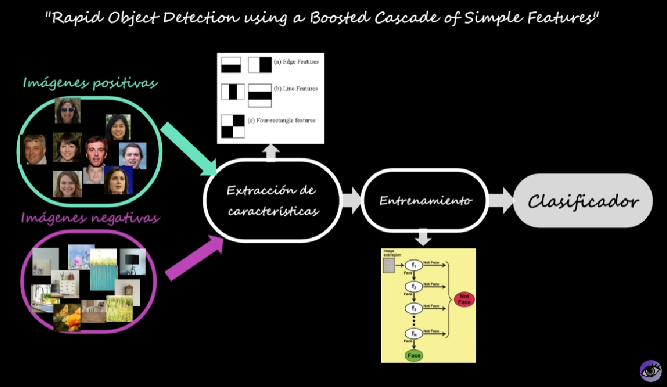

Ahora se verá como realizar la detección de rostro utilizando **Haar Cascades**.<br/>Se comienza guardando el clasificador de archivos XML en la misma carpeta donde está almacenada el script.<br/>En el código se lee una imagen, luego se la transforma en escala de grises y se prueba si funciona bien. A continuación se carga en el código al clasificador XML con la ayuda de `cv2.CascadeClassifier()` y dentro se le da los argumentos del nombre y la extensión del archivo. Una vez que se ha cargado el clasificador es necesario aplicarlo en la imagen, para ello se utilizará `detectMultiScale()` que debe estar seguido de la variable con la cual se ha cargado el clasificador, aquí se le da los argumentos al clasificador para que pueda detectar rostros, y esos argumentos pueden ser `ScaleFactor`, `minNeighborns`, `minSize`, `maxSize`, también se pueden tener en cuenta a otros argumentos dispuestos en la [documentación de OpenCV](https://github.com/opencv/opencv/tree/master/data/haarcascades). Cuando se aplica este detector de rostro en una imagen, en caso de ser detectado algún rostro se almacenarán los puntos `x` , `y` , correspondiente al ancho y alto del rostro que se ha detectado, y se obtiene de la variable `face` que se ha utilizado con el iterador, es justamente por ello que se utiliza un ciclo for para poder desempaquetar toda la imformación de los rostros obtenidos y posteriormente dibujar un rectángulo que lo contenga. Naturalmente se deberán detectar y marcar los rostros dentro de la imagen proporcionada.<br/>
Entre los párametros asignados a `faceclassif.detectMultiScale()` se encuentran:
- **image**: que es la imagen en donde va a actuar el detector de rostro. Se ha probado en imágenes con escala de grises tanto como en imágenes en BGR, obteniendo en ambos casos muy buenos resultados.
- **scaleFactor**: este parámetro establecerá que tanto va a ser reducida la imagen. Por caso, si se ingresa un valor de 1.1 se va a reducir la imagen en un 10% y con un valor 1.3 se reducirá en un 30%. Creando de esta manera una pirámide de imágenes que dependerá del porcentaje introducido en este parámetro. Hay que poner atención en que si se le da un valor muy alto, sobre todo superando el 1.5 se pueden perder la detección de algunos rostros, en tanto que si se le da un valor muy bajo como 1.01 se incrementará sensiblemente el tiempo de procesamiento y el esfuerzo computacional, y además aumentan los falsos positivos, es decir los errores en la detección de rostros. La pirámide de imágenes es para considerar la diferencia de espacio que ocupan los rostros dentro de la imagen, unos pueden ocupar mayor o menor área que otros, por lo que para que se trate de detectar todos lo distintos tamaños se aplica la pirámide de imágenes.
- **minNieghbors**: este parámetro especifica cuántos vecinos debe tener cada rectángulo candidato para retener e identificar un rostro. La explicación es la siguiente: en la lectura de la imagen se encuentra un cuadrado o rectángulo que va deslizándose de izquierda a derecha de arriba hacia abajo cuadro por cuadro de las áreas de la imagen, se puede decir que este cuadrado de área hace su lectura de la imagen buscando algún rostro. Una vez realizado el proceso completo se da que el cuadrado de área en cada lectura ha identificado un rostro pero es el mismo rostro, por lo que cada lectura ha dejado su cuadrado de área marcando el rostro encontrado en cada lectura sobre la misma persona. Entonces cuando hay un número especifico de cuadrados de área, que son los cuadrados de área vecinos que superan el mínimo establecido, entonces se puede confirmar que se trata de un rostro, proponiendose entonces el cuadrado o rectángulo visible. Es bueno mantener un número intermedio para el parámetro minNeighbors, ya que un número muy bajo (demasiada sensibilidad) podría dar falsos positivos, es decir marcar como rostros objetos que no lo son, y un número muy alto (demasiada dureza) puede que no llegue a confirmar algunos rostros.
- **minSize**: este parámetro indica el tamaño mínimo posible del objeto. Los objetos más pequeños serán ignorados. Un término medio de esta medida sería `minSize=(30 , 30)`. Si probamos con `minSize=(70 , 70)` dará como resultado a los rostros con estas dimensiones y los rostros que abarcan áreas menores, o sea rostros más pequeños, no serán detectados.
- **maxSize**: este parámetro indica el tamaño máximo posible del objeto, o sea del rostro. Los objetos más grandes serán ignorados. Inicialmente se habia indicado en el código un `maxSize=(200 , 200)` , si por ejemplo el tamaño de este parámetro se cambia a `maxSize=(60 , 60)` entonces algunos rostros no serán detectados con preferencia a los que ocupan una menor área en la imagen.
##
Por último se va a emplear la detección de rostro en un video streaming aplicado el código Python que se encuentra más abajo. Para afinar los parámetros del código, se puede mover la cabeza para los costados o girar la cabeza y observar cómo reacciona el detector de rostro, o incluso ocultar el rostro a medias con la mano.



  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#Detector de rostro

import cv2
import numpy as np

faceClassif = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

image = cv2.imread('imagen.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = faceClassif.detectMultiScale(gray,
                                     scaleFactor = 1.1,
                                     minNeighbors = 4,
                                     minSize = (30,30),
                                     maxSize = (200,200))
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y),(x+w,y+h),(0,255,0),2)

cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

<img src="https://cdn.jsdelivr.net/gh/homarr-labs/dashboard-icons/svg/jupyter.svg" width="30" height="30" alt="Jupyter Notebook"/> Jupyter Notebook: Adaptación del script

In [ ]:
#Detector de rostro con OpenCV para Jupyter Notebook
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Cargar el clasificador de rostros
faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#Importar imagen
image = cv2.imread('imagen.png')

if image is None:
    print("Error: No se pudo cargar la imagen 'imagen.png'. Verifica la ruta del archivo.")
    #Creamos una imagen de ejemplo si no se puede cargar una imagen real
    image = np.zeros((480, 640, 3), dtype=np.uint8)
    image[:] = [100, 150, 200]                                #color azul claro
    #Dibujar un rostro de ejemplo
    cv2.circle(image, (320, 240), 100, (0, 255, 0), -1)       #rostro
    cv2.circle(image, (280, 220), 15, (0, 0, 0), -1)          #ojo izquierdo
    cv2.circle(image, (360, 220), 15, (0, 0, 0), -1)          #ojo derecho
    cv2.rectangle(image, (300, 260), (340, 280), (0, 0, 0), -1)  #boca

#Convertir a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Detectar rostros
faces = faceClassif.detectMultiScale(gray,
                                     scaleFactor=1.1,
                                     minNeighbors=4,
                                     minSize=(30, 30),
                                     maxSize=(200, 200))

#Dibujar rectangulos como marco del rostro detectado
image_result = image.copy()

for (x, y, w, h) in faces:
    cv2.rectangle(image_result, (x, y), (x + w, y + h), (0, 255, 0), 2)

#Mostrar las imagenes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(image_result, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'Detección de Rostros ({len(faces)} rostros detectados)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f'Número de rostros detectados: {len(faces)}')

El principal reemplazo en la adaptacón a un **Jupyter** es sobre la función `cv2.CascadeClassifier('haarcascade_frontalface_default.xml')` que se convierte en `cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')` , la cual es la ruta correcta para el clasificador de rostros.

#[**Trackbar y Rostros Borrosos con OpenCV**](https://www.youtube.com/watch?v=4tWQFboP5kQ&list=PLBg7GSvtrU2MOLWM0bGU1_FT3LsJPyY-5&index=25)



A continuación se desarrolla una técnica de difuminación del área facial para cuando se requiera presentar imágenes con el rostro borroso, lo cual viene bien en la preservación de la identidad de una persona o cuando son imágenes de índole judicial o policial y hay menores en la misma.<br/>
Primero se va a abordar el desarrollo del **trackbar** y cómo utilizarlo en un desarrollo con **OpenCV**. Luego se va a ver la aplicación ya desarrollada y difuminando cada uno de los rostros. Y finalmente se va a desarrollar este procedimiento para un video streaming.<br/><br/>


Se comienza entonces con la barra deslizante o trackbar, para ello dada una imagen aplicaremos distintos grados de velocidad de difuminado o efecto blur y el suavizado con `cv2.blur()` . Primero se importa la imagen que vamoa utilizar con `cv2.imread()` . Y se comienza directamente usando **trackbar** , para ello será necesario establecer el nombre de la ventana a través de `cv2.namedWindow()`, y se le da un nombre como parámetro.<br/>
Ahora sí se crea la barra deslizante a través del método `cv2.createTrackbar()` . Esta es una barra deslizante como herramienta provista por **OpenCV** para el seguimiento de control deslizante o control de rango y la adjunta a una ventana con un nombre y rango específico. Para poder utilizar este método se necesitará los siguientes parámetros:<br/>
- trackbarname: que es el nombre de la barra de seguimiento creada.
- winname: que es el nombre de la ventana que será usada como padre de la barra de seguimiento creada.
- value: puntero opcional a una variable entera cuyo valor refleja la posición del slide. Después de la creación, la posición del  slide es definida por la variable.
- count: posición máxima del slider. Hay que tener en cuenta que la posición mínima siempre será 0.
- onChange: puntero a este método a llamar cada vez que le slider cambie su posición.<br/>
[Más información en la documentación de OpenCV](https://docs.opencv.org/2.4/doc/tutorials/highgui/trackbar/trackbar.html) <br/><br/>


Entonces, lo que se hizo es establecer a `'Blur'` como nombre de la barra deslizante, `'imagen'` como nombre de la ventana, `0` en value y `7` en count que será el máximo valor que podrá tomar. Se crea una función llamada `nothing` que nos servirá como parámetro para crear el trackbar. Esta última función no hace en concreto ninguna operación sino que simplemente servirá como auxiliar en este caso. Por supesto que se podría crear y reemplazar a esta función por otra que dependan del valor `value` que corresponde al cambio de la posición de la barra deslizante.<br/>
Se emplea un ciclo `while True` que permitirá realizar el proceso indefinidamente hasta que una tecla sea presionada. Cabe destacar que será necesario añadir `image.copy()` para evitar que la imagen de entrada se vaya modificando en cada iteración, y todo esta línea de código se almacenará en la variable `imageN`.  Luego para obtener la posición de la barra de seguimiento o trackbar se usa `cv2.getTrackbarPos(trackbarname, winname)` en los parámetros trackbarname se le da el argumento `'Blur'` y para el parámetro de winname se le da el nombre de la ventana como argumento `'imagenN'`. La posición se almacenará en la variable `val`. Si `val` es mayor a 0 entonces se aplicará `cv2.blur` al cual se le da los argumentos de `image`, seguido del tamaño del kernel conforme a la posición, para ello se escribe allí `(val,val)` . Se añade un else para cuando la imagen sea 0. Y además se necesita que la transmisión se detenga cuando se presione la tecla *Esc*  lo cual se hace con un condicional `if k == 27: break` . Hasta aquí se obtiene un desenfoque o efecto blur en la totalidad de la imagen, será momento de pasar al desenfoque de los rostros.<br/>

##

###  --  Más información en el [Blog de OMES](https://omes-va.com/rostros-borrosos-uso-del-trackbar-opencv-python/)  --

##


  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#Uso del trackbar
import cv2

def nothing(val):
    pass

image = cv2.imread('imagen.png')
cv2.namedWindow('imagen')
cv2.createTrackbar('Blur', 'imagen', 0, 7, nothing)

while True:
    val = cv2.getTrackbarPos('Blur', 'Imagen')
    if val > 0:
        imageN = cv2.blur(image.copy(), (val,val))
    else: imageN = image.copy()
    cv2.imshow('imagen', imageN)
    k = cv2.waitKey(1)
    if k == 27: break
cv2.destroyAllWindows()

Ahora para efectuar el procedimiento de difuminado de rostros se va a acudir al código que ya se ha realizado para la detección de rostros con Haar Cascade. Se establece entonces el mismo procedimiento, se crea el nombre de la ventana y un trackbar para el efecto de difuminado de los rostos. Esta vez se pueden tomar valores entre 0 y 15. Luego se crea la otra barra deslizante, esta vez para que la imagen se muestre a color o en escala de grises, esta podrá tomar valores entre 0 y 1, cero para cuando la imagen se visualice color y uno cuando ya se encuentre en escala de grises. Realizado esto, se necesita obtener la posición de las dos barras deslizantes, para ello se usa a `cv2.getTrackbarPos()` y se establece el nombre del trackbar y la ventana en donde se mostrarán como argumentos en dicho método, ambas se mostararán en la misma ventana:<br/> `cv2.getTrackbarPos('Blur', 'Imagen')` <br/> `cv2.getTrackbarPos('Gray', 'Imagen')`.<br/> Si `if grayVal == 1:` es verdadero entonces la imagen debe transformarse a escala de grises, para ello se usa la función `cv2,cvtColor()`, mientras que si se activa `else: imageN = image` se seguirá mostrando la imagen a color.<br/>
Ahora bien se va a usar la información obtenida de cada rostro detectado, es decir `x`, `y`, `w`, `h`. Entonces si vale mayor a 0 se va a aplicar en dicha área `cv2.blur()`. También se añade `image.copy()` para no obtener problemas en la iteración en la imagen, para que esta no se modifique. Al igual que en el ejemplo anterior el proceso se detendrá cuando se presione la tecla *Esc*.<br/>
Se puede probar cambiando los parámetros del trackbar para afinar los resultados según la imagen.

In [ ]:
#Difuminado del rostro
import cv2

def nothing(val):
    pass

image =  cv2.imread('imagen.png')
imageN = image.copy()
faceClassif = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
cv2.namedWindow('imagenN')
cv2.createTrackbar('Blur', 'imagenN', 0, 15, nothing)

while True:
    val = cv2.getTrackbarPos('Blur', 'Imagen')
    grayval = cv2.getTrackbarPos('Gray', 'Imagen')
    if grayVal == 1:
        imageN = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
    else: imageN = image.copy()
    faces = faceClassif.detectMultiScale(image.copy(), 1.1, 5)

    for (x,y,w,h) in faces:
      if val > 0:
        imageN[y:y+h, x:x+w] = cv2.blur(imageN[y:y+h, x:x+w], (val,val))
      #cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)     #rectangulo que marca el area del rostro
    cv2.imshow('Imagen', imageN)
    k = cv2.waitKey(1)
    if k == 27: break     #Se detiene el proceso con la letra Esc
cv2.destroyAllWindows()

<img src="https://cdn.jsdelivr.net/gh/homarr-labs/dashboard-icons/svg/jupyter.svg" width="30" height="30" alt="Jupyter Notebook"/> Jupyter Notebook: Adaptación del script

In [ ]:
#Generacion de rostros borrosos con OpenCV en un Jupyter Notebook
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Cargar el clasificador de rostros
faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#Leer la imagen
image = cv2.imread('imagen.png')

if image is None:
    print("Error: No se pudo cargar la imagen 'imagen.png'. Verifica la ruta del archivo.")
    #Creamos una imagen de ejemplo si no se puede cargar una imagen real
    image = np.zeros((480, 640, 3), dtype=np.uint8)
    image[:] = [100, 150, 200]
    #Dibujar un rostro de ejemplo
    cv2.circle(image, (320, 240), 100, (0, 255, 0), -1)           #cara
    cv2.circle(image, (280, 220), 15, (0, 0, 0), -1)              #ojo izquierdo
    cv2.circle(image, (360, 220), 15, (0, 0, 0), -1)              #ojo derecho
    cv2.rectangle(image, (300, 260), (340, 280), (0, 0, 0), -1)   #boca

#Convertir a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Detectar rostros
faces = faceClassif.detectMultiScale(gray,
                                     scaleFactor=1.1,
                                     minNeighbors=5,
                                     minSize=(30, 30))

#Aplicar difuminado a los rostros detectados con diferentes valores
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

#Valores de difuminado para probar
valores_blur = [0, 3, 5, 7, 9, 11]

for i, val in enumerate(valores_blur):
    imageN = image.copy()
    for (x, y, w, h) in faces:
        if val > 0:
            imageN[y:y+h, x:x+w] = cv2.blur(imageN[y:y+h, x:x+w], (val, val))

    row = i // 3
    col = i % 3

    axes[row, col].imshow(cv2.cvtColor(imageN, cv2.COLOR_BGR2RGB))
    axes[row, col].set_title(f'Difuminado: {val}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

#Mostrar imagen original y con rostros detectados
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Imagen Original')
axes[0].axis('off')

image_with_faces = image.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(image_with_faces, (x, y), (x + w, y + h), (0, 255, 0), 2)

axes[1].imshow(cv2.cvtColor(image_with_faces, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'Rostros Detectados ({len(faces)} rostros)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f'Número de rostros detectados: {len(faces)}')

#[**Almacenado de Rostro**](https://www.youtube.com/watch?v=ZYPyM4JUU7w)

Aquí se va a desarrollar el script de **Python** con **OpenCV** para almacenar los rostros detectados dentro de una imagen o video.<br/> En primer lugar se va a guardar esos rostros dentro de la misma ruta donde está el script de Python y la imagen de entrada, luego se va a utilizar un banco de imágenes para detectar cada uno de estos rostros, y dichas imágenes se van a guardar en otro directorio diferente cuando se presione una tecla. Finalmente se va a ver cómo guardar los rostros detectados en un video dentro de una nueva carpeta.<br/>

Es importante que el archivo de la imagen que se va a usar debe estar dentro de la misma carpeta del script de Python. En el caso del ejemplo la imagen tiene cinco rostros para detectar, y cada vez que se presione una tecla se marcará con un rectángulo alrededor de un rostro y con la siguiente tecla presionada se marcará otro rostro.<br/>Se crea en el código una copia de la imagen de entrada y se le asigna a la variable `imageAux` que será la imagen de base, luego declaramos `count=0` que será nuestro contador de rostro esto para ponerlo en el nombre de cada rostro almacenado, ya que se tiene las coordenadas `x` y `y` de ancho y alto de cada rostro se recorta el rostro de la imagen de base, que en este caso es `imageAux`.<br/>Luego se redimensiona el rostro encontrado con `cv2.resize()` a 150 de ancho y alto. Esta línea es opcional, puede modificarse o no usarse, sobre todo si se desea conservar el ancho y alto original de cada rostro dentro de la imagen.<br/>
Lo siguiente será guardar estos rostros, para ello se establece un nombre con extensión jpg o png y al final de este se le asigna la función de `count()`<br/>
Visualizando los rostros recortados, luego de realizados estos pasos se podrá ver ya los rostros recortados como imágenes independientes de la imagen base. Estos rostros recortados irán apareciendo y guardándose a medida que se presiona una tecla del teclado.<br/>
La idea de cambiar la imagen de entrada, que es la que ya se ha importado al código desde el archivo original con la variable `image`, por la imagen de base que se ha definido como `imageAux`, es para que no se vea la línea del rectángulo incluida (aunque esto también se puede lograr evitando el redimensionamiento)


  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#Extrayendo Rostros de una Imagen
import cv2

faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

image = cv2.imread('imagen_000.png')
imageAux = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

count = 0

faces = faceClassif.detectMultiScale(gray, 1.1, 5)

for (x,y,w,h) in faces:

  cv2.rectangle(image, (x,y), (x+w,y+h), (128,0,255), 2)
  rostro = imageAux[y:y+h, x:x+w]
  rostro = cv2.resize(rostro, (150,150), interpolation=cv2.INTER_CUBIC)
  cv2.imwrite('rostros/rostro_{}.jpg'.format(count), rostro)
  count = count + 1

  cv2.imshow('rostro', rostro)
  cv2.imshow('image', image)

  cv2.waitKey(0)

cv2.destroyAllWindows()

Hasta aquí se han guardado las imágenes en la misma carpeta del script de **Python**. Pero sería mucho mejor tener una carpeta dedicada con el nombre imágenes (sin acento).<br/>Ya en el código Python lo primero es importar las librerías que se van a utilizar `import cv2` e `import os`. Este último será para crear archivos y directorios. Ahora se asigna la ruta o path donde está la carpeta del banco de las imágenes a la variable `imagePath`. Luego se hace una lista de cada uno de los archivos dentro de esta ruta, de este modo se obtiene el nombre de los archivo que se corresponde con cada uno de las imágenes alamacenadas.<br/>
El siguiente paso será crear una carpeta en donde se almacene los rostros encontrados, para esto se utiliza `os.path.exists()` para saber si no existe un directorio con el nombre rostros y poder crearlo con `os.makerdirs()`, entonces cuando se ejecute el programa se creará la carpeta.<br/>
Lo siguiente será cargar el detector de rostros y declarar `count=0` para que nos ayude con los nombres de las imágenes que se van a almacenar.<br/>
se va a recorrer todos los elementos de `imagePathList` y si se imprime `imagePath` en cada iteración se obtendrá el nombre de las imágenes que han sido detectadas. Luego se leerán cada una de estas imágenes especificando su ruta. Hasta aquí ya se puede visualizar cómo va el proceso hasta este punto, y lo que se verá es a cada una de la imágenes pero aún sin identificar los rostros.<br/>
Ahora bien se va a hacer una imagen auxiliar que será la imagen base para detectar los rostros, esta parte del proceso se hace copiando la imagen de entrada y asignándola a la variable `imageAux`. Transformamos en escala de grises a la imagen de entrada con `cv2.cvtColor()` y se aplica la detección de rostros y que cada una de las coordenadas de los rostros se almacenen en la variable `faces`.<br/>
A continuación se procede a desempaquetar las coordenadas `x` , `y` , ancho y alto `w` , `h`  de cada uno de los rostros detectados y se va a dibujar cada uno de los rectángulos que rodee a los rostros que se detectarán. También se va a visualizar los rostros detectados con un mensaje que se coloca diciendo que si se presiona la tecla "s" se detecten los rostros, en caso contrario se descarte. Además cuando se presione otra tecla el proceso se rompa.<br/>
Para que la acción de almacenamiento sea con la letra s, se debe asignarla en la variable k con un condicional, `if k == ord('s')` si el condicional es True entonces se procederaá con el recorte de los rostros y el redimensionamiento en caso de ser necesario.  

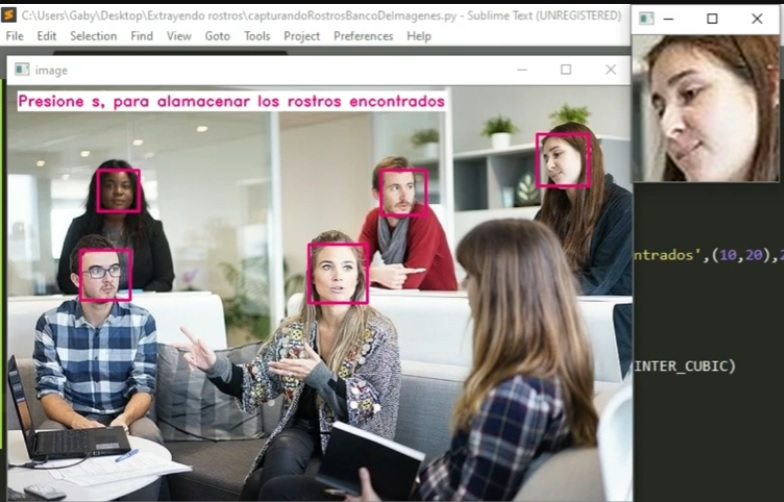

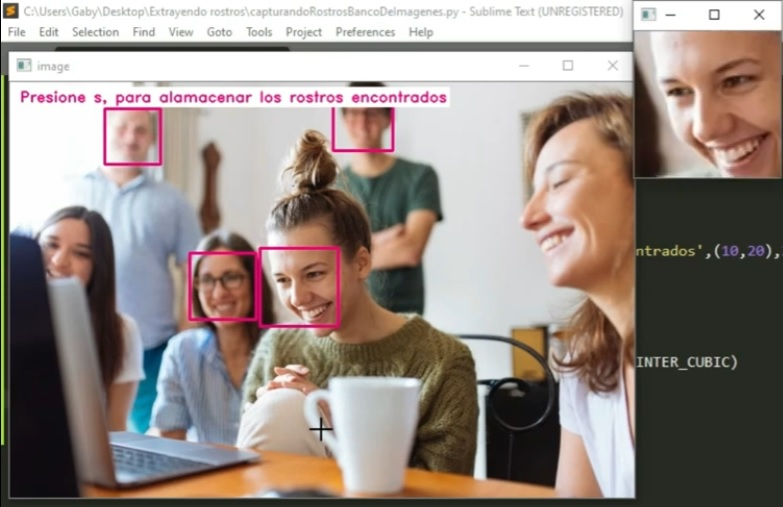

Tal como se van a almacenar todos los rostros en el mismo directorio, entonces será mejor ubicarlo con una línea de código con el nombre del directorio seguido del nombre de la imagen, y al final de esta línea de código se le asignará el valor correspondiente a count. Y no hay que olvidarse de aumentar en +1 en `count`.<br/>Ahora se le asignará a la tecla ESC la acción que rompa el ciclo con `break`.<br/>

  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
image = cv2.imread(imagePath + '/' + imageName)
imageAux = image.copy()
gray = cv2.cvtColor(image, cv2,COLOR_BGR2GRAY)
faces = faceClassif.detectMultiScale(gray, 1.1, 5)

for (x,y,w,h) in faces:
  cv2.rectangle(image, (x,y), (x+w,y+h), (128,0,255), 2)
cv2.rectangle(image, (10,5), (450,25), (255,255,355), -1)
cv2.putText(image, 'Presione s para almacenar los rostros encontrados', (10,20), 2, 0.5, (128,0,255), 1 cv2.LINE_AA)
cv2.imshow('image', image)
k = cv2.waitKey(0)
if k == ord('s'):
  for (x,y,w,h) in faces:
    rostro = auxImage[y:y+h, x:x+w]
    rostro = cv2.resize(rostro, (150,150), interpolation=cv2.INTER_CUBIC)
    #cv2.imshow('rostro', rostro)
    #cv2.waitkey(0)
    cv2.imwrite('Rostro encontrados/rostos_{}.jpg'.format(count), rostro)
    count = count + 1
  elif k == 27:
    break
cv2.destroyAllWindows()

###**Almacenando Rostros de Video Streaming**

Hay que importar **OpenCV**, importar **OS** y luego se debe crear el directorio donde se almacenarán los rostros detectados que se desean guardar.<br/>Luego será fundamental indicar que se leerá un video streaming con `cv2.VideoCapture()` , particularmente en el sistema operativo Windows se puede usar el argumento `cv2.CAP_DSHOW` para que el video ocupe toda la ventana de visualización. Vale aclarar que este código es el mismo si fuera un video y no un video streaming.<br/> Luego se carga el clasificador `cv2.CascadeClassifier()`, luego se inicializa el contador `count` y después se desarrolla el ciclo `while True`.<br/>Dentro del buccle wile se añade el método `cv2.flip()` para poder visualizar como si fuera un espejo.<br/>El resto del código es el mismo que se había realizado para el banco de imágenes. En este bucle también se agrega donde se almacenarán los rostros detectados cuando se presiona la tecla "s".     

In [ ]:
import cv2
import os

imagePath = "C:/User/Desktop/ExtrayendoRostro/Imagenes"
imagePathList = os.listdir(imagePath)
print('imagePathList=', imagePathList)

if not os.path.exists('Rostros encontrados'):
  print('Carpeta creada: Rostros encontrados')
  os.makedirs('Rostros encontrados')

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)  #Puede ser un video o un video streaming

faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

count = 0

while True:
  ret, frame = cap.read()
  frame = cv2.flip(frame, 1)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  auxFrame = frame.copy()

  faces =faceClassifdetectMultiScale(gray, 1.3, 5)

  k = cv2.waitkey(1)
  if k == 27:
    break

  for (x,y,w,h) in faces:
    cv2.rectangle(frame, (x,y), (x+w, y+h), (128,0,255), 2)
    rostro = auxFrame[y:y+h], [x:x+w]
    rostro = cv2.resize(rostro, (150,150), interpolation=cv2.INTER_CUBIC)
    if k == ord('s'):
      cv2.imwrite('Rostros encontrados/rostro_{}.jpg'.format(count), rostro)
      cv2.imshow('rostro', rostro)
      count = count + 1

  cv2.rectangle(frame, (10,50), (450,25), (255,255,255), -1)
  cv2.putText(frame, 'Presione s para almacenar los rostros encontrados', (10,20), 2, 0.5, (128,0,255), 1 cv2.LINE_AA)
  cv2.imshow('frame',frame)

cv2.release()
cv2.destroyAllWindows()

<img src="https://cdn.jsdelivr.net/gh/homarr-labs/dashboard-icons/svg/jupyter.svg" width="30" height="30" alt="Jupyter Notebook"/> Jupyter Notebook: Adaptación del script

In [ ]:
#Almacenando rostros detectados con Python y OpenCV en un Jupyter Notebook
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

#Cargar el clasificador de rostros
faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#Leer la imagen
image = cv2.imread('imagen_000.png')

if image is None:
    print("Error: No se pudo cargar la imagen 'imagen_000.png'. Verifica la ruta del archivo.")
    #Creamos una imagen de ejemplo si no se puede cargar una imagen real
    image = np.zeros((480, 640, 3), dtype=np.uint8)
    image[:] = [100, 150, 200]
    #Dibujar un rostro de ejemplo
    cv2.circle(image, (320, 240), 100, (0, 255, 0), -1)         #cara
    cv2.circle(image, (280, 220), 15, (0, 0, 0), -1)            #ojo izquierdo
    cv2.circle(image, (360, 220), 15, (0, 0, 0), -1)            #ojo derecho
    cv2.rectangle(image, (300, 260), (340, 280), (0, 0, 0), -1) #boca

#Crear directorio para almacenar rostros
os.makedirs('rostros', exist_ok=True)

imageAux = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

count = 0
rostros_detectados = []

faces = faceClassif.detectMultiScale(gray, 1.1, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (128, 0, 255), 2)
    rostro = imageAux[y:y+h, x:x+w]
    rostro = cv2.resize(rostro, (150, 150), interpolation=cv2.INTER_CUBIC)

    #Almacenar rostro
    cv2.imwrite(f'rostros/rostro_{count}.jpg', rostro)
    rostros_detectados.append(rostro)
    count += 1

#Mostrar la imagen original con rostros detectados
plt.figure(figsize=(10, 6))
plt.title(f'Imagen con Rostros Detectados ({len(faces)} rostros)')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

#Mostrar los rostros detectados
if rostros_detectados:
    fig, axes = plt.subplots(1, len(rostros_detectados), figsize=(15, 5))
    if len(rostros_detectados) == 1:
        axes = [axes]

    for i, rostro in enumerate(rostros_detectados):
        axes[i].imshow(cv2.cvtColor(rostro, cv2.COLOR_BGR2RGB))
        axes[i].set_title(f'Rostro {i}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

print(f'Número de rostros detectados: {len(faces)}')
print(f'Rostros almacenados en la carpeta "rostros"')

#Para la segunda parte del código (almacenar rostros al presionar 's')
#Esta parte no se puede replicar exactamente en Jupyter, pero mostramos una alternativa visual
image2 = image.copy()
cv2.rectangle(image2, (10, 5), (450, 25), (255, 255, 255), -1)
cv2.putText(image2, 'Presione s para almacenar los rostros encontrados', (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (128, 0, 255), 1, cv2.LINE_AA)

plt.figure(figsize=(10, 6))
plt.title('Imagen con Instrucción')
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Primero para un contexto de **Jupyter** se carga el clasificador de rostros, `cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'` .<br/>
La visualización con **Matplotlib** se efectua con la función `matplotlib.pyplot.imshow()` .<br/>
El almacenamiento de rostros se realiza en dos pasos: primero se crean rostros detectados y se almacenan en una carpeta llamada "rostros". Segundo, se muestran los rostros detectados en subplots.<br/>
Será necesario para esto la creación de un directorio, el cual se crea automáticamente si es que este no existe.<br/>
La parte del código que depende de presionar una tecla ('s') no se puede replicar exactamente en Jupyter, pero se muestra una alternativa visual.

#[**Reconocimiento Facial en Video Streaming**](https://www.youtube.com/watch?v=cZkpaL36fW4&t=18s)


Con un poquito de mayor complejidad se desarrolla aquí la detección de rostros con **OpenCV** y otras herramientas como **Eigenfaces**, **Fisherfaces**, y **LBPH** o histograma de patrones binarios locales.<br/>
Lo primero que se va a hacer es crear un script para obtener o capturar los rostros de las personas que se desean reconocer, es decir que se va a necesitar una base de datos con los rostros. Con esta base de datos de rostros se van a probar los tres métodos, más otro método sobre un video streaming.<br/>
Para comenzar hay que hacer una carpeta en la computadora que se puede llamar "Reconocimiento_Facial" y dentro de la misma otra carpeta denominada "Data", allí se van a encontrar los rosotros que se desean reconocer. En otra carpeta llamada "Imagenes_y_videos" se colocan los videos y fotos que se van a usar para que el código trabaje. Y finalmente otra carpeta con las imágenes, que pueden ser fotos o videos, para entrenar al código con los rostros que se deben reconocer. Y por último en este paso se va a crear afuera de las carpetas un archivo denominado capturando_rostros.py en el cual se desarrollará el script en el IDE.<br/>
En el script, primero se importa las librerías que se van a necesitar.A continuación se escribe la variable `personName` para el nombre de la persona, y la variable `dataPath` para la ruta de acceso a la carpeta donde se almacenarán los rostros, en caso de no existir un nombre de esa carpeta se creará entonces dicha carpeta para lo cual se utiliza el condicional `if not os.path.exist:` y de este modo se soluciona la verificación y creación de la carpeta de almacenado.<br/>
Ahora bien en la variable `cap` se lee el video con el que se va a trabajar (también podría ser un video streaming).<br/>Se inicializa así el detector de rostros con HaarCascade `faceClassif = cv2.CascadeClassifier(cv2.data.haarcascade+´haarcascades_frontalface_default.xml')`. Y además se inicializa un contador.<br/>
A continuación y dentro de un bucle while se va a leer cada imagen, o fotograma del video, y se va a redimensionar en caso de que el tamaño sea muy grande. El proceso es idéntico al apartado anterior, con la diferencia que en este caso no hace falta que se presione la letra "s" para guardar un rostro sino que se van a almacenar 300 rostros de forma automática para lo cual se agrega un condicional dedicado al conteo de los rostros que se guardan.<br/>Se almacena los rostros con el mismo tamaño con 150x150 pixeles (pero este tamaño es arbitrario según cada desarrollador).<br/>


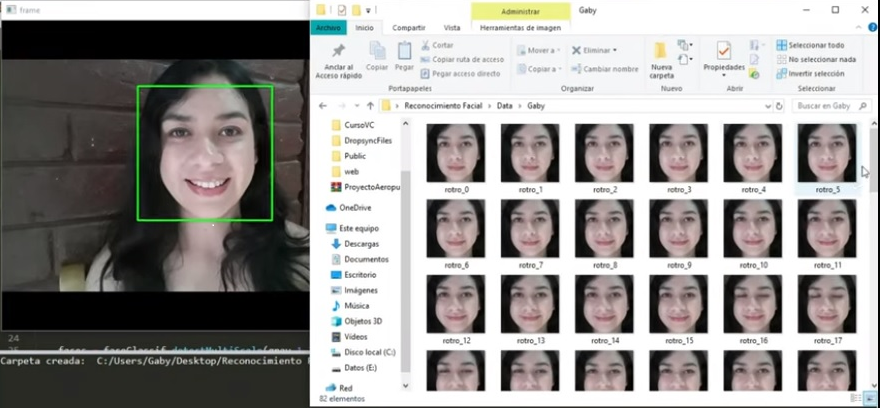

  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#Capturando los rostros

import cv2
import os
import imutils

personName = 'Carla' #Nombre de la persona que se va a capturar
dataPath = 'C:\Users\Desktop\Reconocimiento Facial'
personPath = dataPath + '/' + personName
#print(personPath)

if not os.path.exists(personPath):
    print('Carpeta creada: ',personPath)
    os.makedirs(personPath)

Cap = cv2.VideoCapture('Carla.mp4')

faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
count = 0

while True:
  ret, frame = cap.read()
  if ret == False: break
  frame = imutils.resize(frame, width=640)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  auxFrame = frame.copy()

  faces = faceClassif.detectMultiScale(gray,1.3,5)

  for (x,y,w,h) in faces:
    cv2.rectangle(frame, (x,y),(x+w,y+h),(0,255,0),2)
    rostro = auxFrame[y:y+h,x:x+w]
    rostro = cv2.resize(rostro, (150,150), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite(personPath + '/rostro_{}.jpg'.format(count), rostro)
    count = count + 1
  cv2.imshow('frame',frame)


  k = cv2.waitKey(1)
  if k == 27 or count >= 300:
    break
cap.release()
cv2.destroyAllWindows()

En una segunda etapa, hay que ocuparse ahora de la preparación de los datos para el entrenamiento. Para ello se crea un script llamado rf.py, el cual estará en la carpeta general del proyecto. Vale decir que el procedimineto se se hará aquí sirve por igual para los tres métodos **EhigenFaces**, **FisherFaces** y **LBPH** o local binary histogram.<br/>
En el código, luego de importar cv2, os y numpy, se agrega la variables para almacenar las imágenes, y en la variable `peopleList` se lista dichas imágenes. Si se imprime se obtendrá una lista de las carpetas creadas y sus imágenes, dado que este es un segundo paso en el paso anterior ya se han alojado algunas imágenes que ahora se pueden recuperar.<br/>
Se dispone ahora de un contador `label` inicializado en 0 y se van a crear dos array vacíos `labels` y `facesData`. Estos dos arrays son muy importantes para el entrenamiento, ya que hay que presentarle los rostros al computador pero ¿cómo sabe el computador cuál es el rostro de quién?. Bueno para eso se debe usar una etiqueta, en ese caso entonces todas las imágenes de rostros de la primera persona tendrá la etiqueta 0 y todas las imágenes de rostros de la segunda persona tendra la etiqueta 1. Si fueran más rostros tendrían otros números correspondientes para identificarlos y así el computador sabrá quién es quien.<br/>
A continuación se procede a leer todas las imágenes en las carpetas `peopleList` a través del bucle for. En el primer bucle for se leen las imágenes de rostros de las carpetas, mientras que en el segundo bucle for se leeran cada uno de los rostros.<br/>Ahora bien se pasa a almacenar los rostros y las etiquetas que le corresponden a cada uno, por eso en `labels` se añade el valor de `label`, mientras que en `facesData` se añade cada uno de los valores en escala de grises.


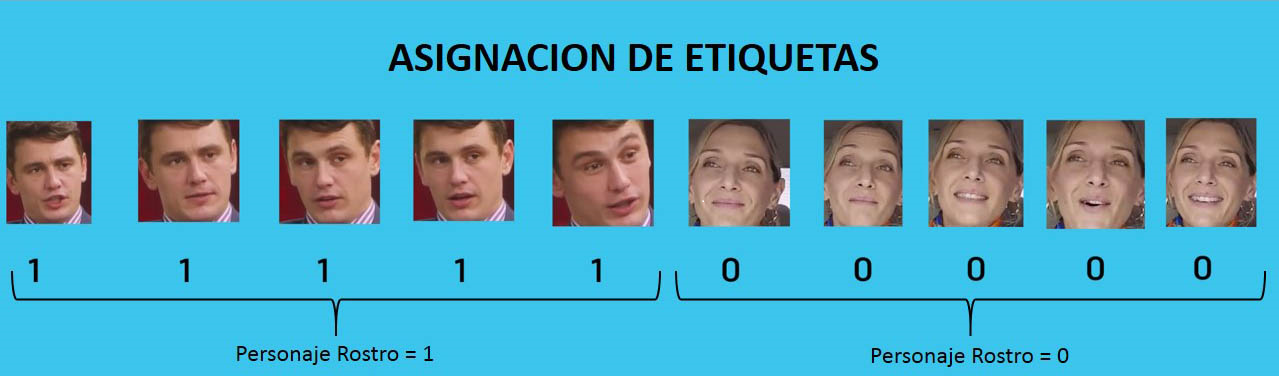

  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#Preparando los datos para el entrenamiento

import cv2
import os
import numpy as np


dataPath = 'C:\Users\Desktop\Reconocimiento Facial'
peopleList = os.listdir(dataPath)
print("Lista de personas: ", peopleList)

labels = []
facesData = []
label = 0

for faceName in peopleList:
  personPath = dataPath + '/' + nameDir
  print("Leyendo imágenes")

  for fileName in os.listDir(personPath):
    print("Rostros", nameDir + "/" + fileName)
    labels.append(label)
    facesData.append(cv2imread(personPath+"/"+fileName,0))
    image = cv2.imread(personPath+"/"+fileName,0)
    #cv2.imshow("image",image)
    #cv2.waitKey(10)
  label = label + 1

print("label= ", label)
print("Número de etiquetas 0: ", np.count_nonzero(np.array(labels)==0))  #Tenemos 300 ceros
print("Número de etiquetas 1: ", np.count_nonzero(np.array(labels)==1))  #Tenemos 300 unos


###Entrenamiento EigenFaces
En el primer método de entrenamiento.<br/>Primero se asigna a una variable el correspondiente método `face_recognizer = cv2.face.EigenFaceRecognizer_create()` <br/>
- Las imágenes de entrenamiento como las de predicción deben estar en escala de grises.
- El método EigenFaces asume que todas las imágenes ya sean de entrenamiento o de test deben tener el mismo tamaño.

Ahora bien a la variable de entrenamiento se le da el método train `face_recognizer.train(facesData, np.array(labels))` y en los parámetros se le da el array en donde están almacenados los rostros y luego la etiqueta de cada uno de estos que se encuentran en labels, el cual va dentro de un array de **Numpy** ya que es necesario para hacer operaciones con los números de las etiquetas.<br/>
Método `train()`:<br/>
- Sirve para el entenamiento de las imágenes.
- Parámetro: facesData, imágenes de entrenamiento.
- Parámetro: np.array(labels), las etiquetas correspondientes a las imágenes.

Una vez entrenado el reconocedor de rostro es posible almacenarlos. Este es un paso óptimo ya que el entrenamiento lleva tiempo y con mayor razón si son varias personas que se desean reconocer, es por ello que es conveniente guardar los datos del modelo obtenido para luego leerlo en otro script, y de este modo se ahorra tiempo de volverlo a entrenar y pasamos a ejecutar código desde sus datos. Para esto se utiliza al método `write()` junto con la variable `face_recognizer.write('modeloEigenFaces.xml)`, el parámetro es el nombre que se le asigna al modelo. Y bien, de este modo se verá luego en la carpeta de reconocimeinto facial el archivo XML.





###Probar el modelo EigenFaces
Aquí se comienza con la ruta o path de la carpeta de las personas que se desean reconocer y se la va a listar para obtener solamente sus nombres. Es decir que al momento de la visualización del reconocimiento facial se tomarán de aquí los nombres.<br/>Se llama al método **EigenFaces**  `face_recognizer = cv2.face.EigenFaceRecognizer_create()`.<br/>A continuación se leerá el modelo recientemente creado a través del método `read()`.<br/>Con `cv2.VideoCapture()` se leen las imágenes en las que se va a trabajar.<br/> Luego se utiliza al método para clasificar las imágenes `cv2.CascadeClassifier()`. Y el bloque de codigo que le sigue es similar al de clasificación.<br/>Hay que tener en cuenta que se debe redimensionar a 150x150 pixeles la imagen del rostro en escala de grises, ya que fue lo que se usó para entrenar al reconocedor de rostro.<br/>Adicionalemente se usa el método `predict()` y como parámetro se le da el rostro a identificar.<br/>
**Predict()** predice una etiqueta y la confianza asociada (por ejemplo, la distancia) para una imagen de entrada determinada. En este caso son rostros. Obtendremos a cambio dos valores. Se va a visualizar entonces estos dos valores con el método `cv2.putText()` y un rectángulo que rodee al rostro.<br/>Vale recordar la importancia de la iluminación y el fondo para que la captura sea óptima.<br/>
El método EigenFaces se trata de obtener los valores de las capturas en entrenamiento y en función de esos valores se le adjudica un nombre al rostro detectado. Por ejemplo, si en el video los valores detectados en la etiqueta son (1, 3500.00) a (1, 3900.00) y en un segundo video de entrenamiento los valores de la etiqueta son (1, 5600.00), estos valores se tienen en cuanta para proponerlos en el código y así se adjudica la etiqueta correcta al rostro. Esto se hace con un condicional para EigenFaces. En este condicional se prevee que según los valores de la etiqueta sea un rostro ya definido o de lo contrario dirá que es un rostro desconocido. Por supuesto que los valores no se aplican a todos los casos puesto que las imágenes de cada base de datos ofrecera valores distintos.<br/>
Cuando la etiqueta tiene valores bajos o cercanos a cero queire decir que el rostro a identificar tiene mucha similitud al de los entrenados.

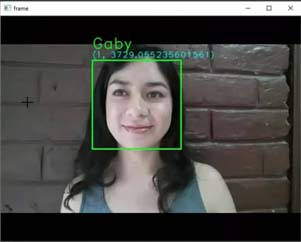

  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#En un nuevo archivo: reconocimiento_facial_EigenFaces.py

import cv2
import os

dataPath = 'C:\Users\Desktop\Reconocimiento Facial\Data'
imagePaths = os.listdir(dataPath)
print('imagePaths= ', imagePaths)

face_recognizer = cv2.face.EigenFaceRecognizer_create()

#Leyendo el modelo
facerecognizer.read('modeloEigenFaces.xml')

cap = cv2.VideoCapture('Imagenes_de_prueba.mp4')
#cap = cv2.VideoCapture('Imagenes_de_prueba_2.mp4')

faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

while True:
  ret, frame = cap.read()
  if ret == False: break
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  auxFrame = gray.copy()

  faces = faceClassif.detectMultiScale(gray, 1.3, 5)

  for (x,y,w,h) in faces:
    rostro = auxFrame[y:y+h,x:x+w]
    rostro = cv2.resize(rostro,(150,150), interpolation=cv2.INTER_CUBIC)
    result = face_recognizer.predict(rostro)

    cv2.putText(frame, '{}'.format(result), (x,y-5), 1, 1.3, (255,255,0), 1, cv1.LINE_AA)

    #Valores de etiqueta en EigenFaces
    if result[1] < 5700:
      cv2.putText(frame, '{}'.format(imagePath[result[0]]), (x,y-25), 1, 1.1, (0,255,0), 1, cv1.LINE_AA)
      cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
    else:
      cv2.putText(frame, 'Desconocido', (x,y-20), 2, 0.8, (0,0,255), 1, cv1.LINE_AA)
      cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255), 2)

  cv2.imshow('frame', frame)
  k = cv2.waitKey(1)
  if k == 27:
    break

cap.release()
cv2.destroyAllWindows()

###Entrenamiento con FisherFaces
El código es muy similar al anterior con algunas modificaciones, sobre todo la variable en la que se asigna el modelo FisherFaces `face_recognizer = cv2.face.FisherFaceRecognizer_create` <br/>
- Las imágenes de entrenamiento como de predicción deben estar en escala de grises.
- El método FisherFaces asume que todas las imágenes, ya sean de entrenamiento y test deben tener el mismo tamaño.

También se debe cambiar el nombre del modelo que se va a entenar, en este caso a `face_recognizer.write('modeloFisherFaces.xml')`.<br/>Luego se debe esperar a que se realice el entrenamiento y se almacene el resultado del modelo. Al finalizar se verá que aparece un nuevo archivo xml en la carpeta de Reconocimiento Facial.

  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#En un archivo entrenamiento_ficherFaces.py

import cv2
import os

dataPath = 'C:\Users\Desktop\Reconocimiento Facial\Data'
imagePaths = os.listdir(dataPath)
print('imagePaths= ', imagePaths)

face_recognizer = cv2.face.FisherFaceRecognizer_create()

#Leyendo el modelo
facerecognizer.read('modeloFisherFaces.xml')

cap = cv2.VideoCapture('Imagenes_de_prueba.mp4')
#cap = cv2.VideoCapture('Imagenes_de_prueba_2.mp4')

faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

while True:
  ret, frame = cap.read()
  if ret == False: break
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  auxFrame = gray.copy()

  faces = faceClassif.detectMultiScale(gray, 1.3, 5)

  for (x,y,w,h) in faces:
    rostro = auxFrame[y:y+h,x:x+w]
    rostro = cv2.resize(rostro,(150,150), interpolation=cv2.INTER_CUBIC)
    result = face_recognizer.predict(rostro)

    cv2.putText(frame, '{}'.format(result), (x,y-5), 1, 1.3, (255,255,0), 1, cv1.LINE_AA)

    #Valores de etiqueta en FisherFaces
    if result[1] < 5700:
      cv2.putText(frame, '{}'.format(imagePath[result[0]]), (x,y-25), 1, 1.1, (0,255,0), 1, cv1.LINE_AA)
      cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
    else:
      cv2.putText(frame, 'Desconocido', (x,y-20), 2, 0.8, (0,0,255), 1, cv1.LINE_AA)
      cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255), 2)

  cv2.imshow('frame', frame)
  k = cv2.waitKey(1)
  if k == 27:
    break

cap.release()
cv2.destroyAllWindows()


###Probar el modelo FisherFaces
Para probar el modelo de reconocimiento facial se usa el mismo código, solamente se tiene que cambiar el método `write()` por el método `read()`.<br/>
Luego de probarlo con el primer video en este caso se obtiene la etiqueta 1 con un valor de confianza de 171,7 a 400,17. El segundo video tiene una etiqueta de 1 y un valor de confianza de 150,06 a 300. Y en un tercer video en donde cambia la persona, la estiqueta es de 1 y el valor de confianza es de 900,00 a mas de 1000,00<br/>
> Tal como se ve, estos valores de **FisherFaces** son distintos a los de EigenFaces. Es por esto que el valor con el que se comparará deben pertencer al mismo tipo modelo.

Por esto es que estas pruebas son necesarias para obtener un valor a comparar y así determinar que en función a estas comparaciones se va a verificaar si se trata de la persona que se está buscando o no. Se puede probar entonces con un valor de 500 en el condicional de tal manera que todas aquellas detecciones que mantengan un valor mayor a 500 serán identificados como desconocidos.  

  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#Probando el modelo FisherFaces

import cv2
import os

dataPath = 'C:\Users\Desktop\Reconocimiento Facial\Data'
imagePaths = os.listdir(dataPath)
print('imagePaths= ', imagePaths)

face_recognizer = cv2.face.FisherFaceRecognizer_create()

#Leyendo el modelo
facerecognizer.read('modeloFisherFaces.xml')

cap = cv2.VideoCapture('Imagenes_de_prueba.mp4')
#cap = cv2.VideoCapture('Imagenes_de_prueba_2.mp4')

faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

while True:
  ret, frame = cap.read()
  if ret == False: break
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  auxFrame = gray.copy()

  faces = faceClassif.detectMultiScale(gray, 1.3, 5)

  for (x,y,w,h) in faces:
    rostro = auxFrame[y:y+h,x:x+w]
    rostro = cv2.resize(rostro,(150,150), interpolation=cv2.INTER_CUBIC)
    result = face_recognizer.predict(rostro)

    cv2.putText(frame, '{}'.format(result), (x,y-5), 1, 1.3, (255,255,0), 1, cv1.LINE_AA)

    #Valores de etiqueta en FisherFaces
    if result[1] < 500:
      cv2.putText(frame, '{}'.format(imagePath[result[0]]), (x,y-25), 2, 1.1, (0,255,0), 1, cv1.LINE_AA)
      cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
    else:
      cv2.putText(frame, 'Desconocido', (x,y-20), 2, 0.8, (0,0,255), 1, cv1.LINE_AA)
      cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255), 2)

  cv2.imshow('frame', frame)
  k = cv2.waitKey(1)
  if k == 27:
    break

cap.release()
cv2.destroyAllWindows()

###Entrenamiento con LBPH
Como tercera forma de entrenamiento se encuentra LBPH. En este caso se hará uso del método `cv2.face.LBPHFaceRecognizer_create()`:
- Las imágenes de entrenamiento como de predicción deben estar en escala de grises.

Entonce con solamente remplazar dicho método en el código que ya se realizó con anterioridad se obtendrán los resultados buscados y se almacenará un archivo xml en la carpeta de Reconocimiento Facial.


  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#En un archivo LBPH_face_entrenamiento.py

import cv2
import os

dataPath = 'C:\Users\Desktop\Reconocimiento Facial\Data'
imagePaths = os.listdir(dataPath)
print('imagePaths= ', imagePaths)

face_recognizer = cv2.face.LBPHFaceRecognizer_create()

#Leyendo el modelo
facerecognizer.read('modeloLBPHFaces.xml')

cap = cv2.VideoCapture('Imagenes_de_prueba.mp4')
#cap = cv2.VideoCapture('Imagenes_de_prueba_2.mp4')

faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

while True:
  ret, frame = cap.read()
  if ret == False: break
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  auxFrame = gray.copy()

  faces = faceClassif.detectMultiScale(gray, 1.3, 5)

  for (x,y,w,h) in faces:
    rostro = auxFrame[y:y+h,x:x+w]
    rostro = cv2.resize(rostro,(150,150), interpolation=cv2.INTER_CUBIC)
    result = face_recognizer.predict(rostro)

    cv2.putText(frame, '{}'.format(result), (x,y-5), 1, 1.3, (255,255,0), 1, cv1.LINE_AA)

    #Valores de etiqueta en LBPH Faces
    if result[1] < 70:
      cv2.putText(frame, '{}'.format(imagePath[result[0]]), (x,y-25), 1, 1.1, (0,255,0), 1, cv1.LINE_AA)
      cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
    else:
      cv2.putText(frame, 'Desconocido', (x,y-20), 2, 0.8, (0,0,255), 1, cv1.LINE_AA)
      cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255), 2)

  cv2.imshow('frame', frame)
  k = cv2.waitKey(1)
  if k == 27:
    break

cap.release()
cv2.destroyAllWindows()

###Probar el modelo LBPH Faces
Para probar el modelo LBPH se utiliza el mismo código que se hizo para probar los modelos anteriores con los respectivos cambios para el modelo de LBPH.<br/>Cuando se visualiza, la etiqueta 1 con valores de confianza de 50.00 a 70.00. En tanto que el segundo video tiene valores de entre 63.00 y 79.50. Y en el tercer video se obtienen valores entre 66.60 y 75,50. Estos valores dan alguna idea de con qué se va a comparar. Entonces los valores mayores a 70 se vana a determinar como desconocidos. Y los resultados son óptimos.

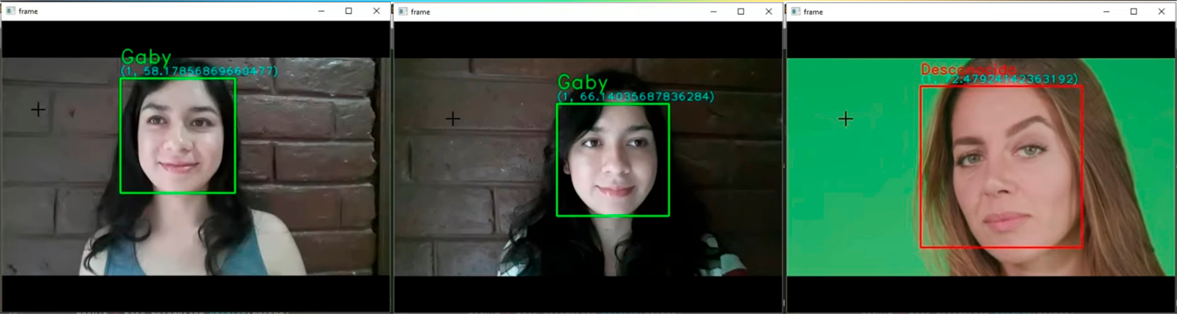

  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#Probando el modelo LBPHFaces

import cv2
import os

dataPath = 'C:\Users\Desktop\Reconocimiento Facial\Data'
imagePaths = os.listdir(dataPath)
print('imagePaths= ', imagePaths)

face_recognizer = cv2.face.LBPHFaceRecognizer_create()

#Leyendo el modelo
facerecognizer.read('modeloFisherFaces.xml')

cap = cv2.VideoCapture('Imagenes_de_prueba.mp4')
#cap = cv2.VideoCapture('Imagenes_de_prueba_2.mp4')

faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

while True:
  ret, frame = cap.read()
  if ret == False: break
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  auxFrame = gray.copy()

  faces = faceClassif.detectMultiScale(gray, 1.3, 5)

  for (x,y,w,h) in faces:
    rostro = auxFrame[y:y+h,x:x+w]
    rostro = cv2.resize(rostro,(150,150), interpolation=cv2.INTER_CUBIC)
    result = face_recognizer.predict(rostro)

    cv2.putText(frame, '{}'.format(result), (x,y-5), 1, 1.3, (255,255,0), 1, cv1.LINE_AA)

    #Valores de etiqueta en FisherFaces
    if result[1] < 500:
      cv2.putText(frame, '{}'.format(imagePath[result[0]]), (x,y-25), 2, 1.1, (0,255,0), 1, cv1.LINE_AA)
      cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
    else:
      cv2.putText(frame, 'Desconocido', (x,y-20), 2, 0.8, (0,0,255), 1, cv1.LINE_AA)
      cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255), 2)

  cv2.imshow('frame', frame)
  k = cv2.waitKey(1)
  if k == 27:
    break

cap.release()
cv2.destroyAllWindows()

Ahora bien cabe preguntarse qué pasaría si se utiliza el mismo modelo creado en otro lugar, con otra cámara diferente, o con otra luz distinta al del entrenamiento. Bien el resultado no es óptimo sino que el modelo no reconoce a la imagen otorgada en el entrenamiento. La solución es darle más variedad a los rostros a entrenar, es decir darle cien rostros más en el nuevo ambiente. En el código se modifica el contador para que en vez de 100 comience en 300 considerando que son imágenes que se van a agregar a las que ya están en la carpeta de reconocimiento de rostros. Así también se cambia a 400 en la condición `if k == 27 or count >= 400:` . Estás imágenes pueden ser tomadas desde un video streaming.<br/>En la carpeta dedicada a cada rostro dentro de la carpeta de reconocimiento de rostro se podrá constatar que se han agregado 100 nuevas capturas del rostro, con la particularidad que ahora se respeta el nuevo ambiente. Constatado dicho paso, se puede entrenar el modelo con las fotos de rostros.<br/>
Se pone a prueba el código con un video streaming y vemos si reconoce los rostros efectivamente.<br/>
>Para que el modelo de reconocimiento de rostros tenga una mayor robustez y aumente la precision y efectividad del reconocimiento, debe tener una mayor diversidad de fotos en el entrenamiento con mayor variedad de entornos.    


#[**Difuminado Facial en Video Streaming**](https://www.youtube.com/watch?v=4tWQFboP5kQ&list=PLBg7GSvtrU2MOLWM0bGU1_FT3LsJPyY-5&index=27)

Bien, se va a explicar ahora como realizar rostros difuminados en un video streaming. El código de **Python** es muy similar al que se hizo para el difuminado de imágenes. Solamente varìa en que en este caso se utiliza a `cv2.VideoCapture(0)` para capturar al video. Así también en el ciclo while se va a utilizar la línea `ret, frame = cap.read()` para obtener las imágenes que se van a almacenar en frame. Y por último se debe finalizar la captura del video con `cv2.release()`.<br/>
Se verá entonces como resultado que se obtiene un video con dos slider encima, los cuales al variarlos se pone borroso un rostro, o si se cambia el segundo slider la imagen pasa de color a escala de grises.


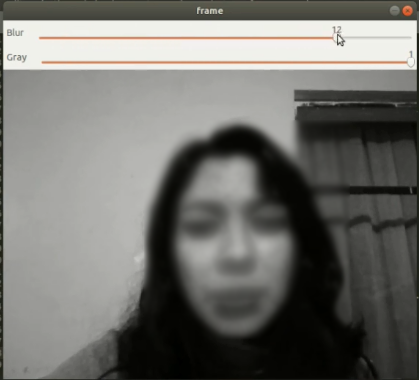

  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#Difuminado Facial en Video
import cv2

def nothing(x):
    pass

cap = cv2.VideoCapture(0)
faceClassif = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
cv2.namedWindow('frame')
cv2.createTrackbar('Blur', 'frame', 0, 15, nothing)
cv2.createTrackbar('Gray', 'frame', 0, 1, nothing)

while True:
  ret, frame = cap.read()
    val = cv2.getTrackbarPos('Blur', 'Imagen')
    grayval = cv2.getTrackbarPos('Gray', 'Imagen')
    if grayVal == 1:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceClassif.detectMultiScale(frame, 1.3, 5)

    for (x,y,w,h) in faces:
      if val > 0:
        frame[y:y+h, x:x+w] = cv2.blur(frame[y:y+h, x:x+w], (val,val))

    cv2.imshow('frame', frame)
    k = cv2.waitKey(1) & 0xFF
    if k == 27: break     #Se detiene el proceso con la letra Esc
cap.release()
cv2.destroyAllWindows()

#[**Tesseract y Pytesseract**](https://www.youtube.com/watch?v=_j6o2rBkhhg&list=PLBg7GSvtrU2MOLWM0bGU1_FT3LsJPyY-5&index=27)

[Tesseract en Github](https://github.com/tesseract-ocr/tesseract)

###**Instalación**:

Instalación de **Tesseract** en Windows:<br/>

Descargar la versión más reciente para 64 bits.<br/>

Para poder emplear reconocimiento óptico de caracteres con **Python** se necesita instalar **Pytesseract**.<br/>

Instalación **Pytesseract**:<br/>

```
   pip install pytessract
```

Copiar y pegar esa línea de instalación en el CMD de Windows.<br/>


###**Probar OCR con Python**:

Emplear el código correspondiente que está a continuación.<br/>
Se trata de un proceso en el cual se importa primero la librería de **OpenCV** y **Pytesseract**.<br/>

Antes de leer la imagen se debe insertar la línea que aseguran la comunicación de **Tesseract** con el path de Windows:<br/>

```
pytesseract.pytesseract.tesseract_cmd = r'<full_path_to_your_tesseract_executable>
```

Reemplazar lo que está después de `r` con la línea de path donde se encuentra instalado tesseract, por ejemplo
```
 'C:\Program Files\Tesseract-OCR\tesseract'
```

Luego se lee la imagen con **OpenCV**. Y para poder usar el reconocimiento de caracteres en la imagen se usa el método `pytesseract.image_to_string()` y como argumento la variable en donde está almacenada la imagen. Además se le puede agregar como segundo parámetro `lang='spa'` para que reconozca caracteres en español. Esto se almacenará en la variable `text`.<br/>

Se imprime dicha variable con `print()`. Además se va a visualizar la imagen que se está usando, y finalmente se va a visualizar la misma con `cv2.imshow()`  <br/>

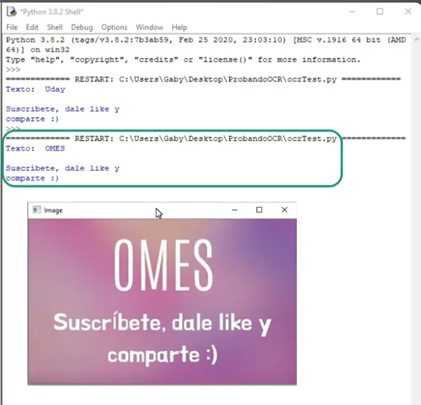



OMES:
https://www.youtube.com/watch?v=_j6o2rBkhhg&list=PLBg7GSvtrU2MOLWM0bGU1_FT3LsJPyY-5&index=26

  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#Tesseract para el reconocimiento de caracteres

import cv2
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

imagen = cv2.imread('imagenColoresFondo.jpg')

text= pytesseract.image_to_string(imagen, lang='spa')
print('Text: ', text)

cv2.imshow('Imagen', imagen)
cv2.waitKey(0)
cv2.destroyAllWindows()


<img src="https://cdn.jsdelivr.net/gh/homarr-labs/dashboard-icons/svg/jupyter.svg" width="30" height="30" alt="Jupyter Notebook"/> Jupyter Notebook: Adaptación del script

In [ ]:
#Reconocimiento optico de caracteres con PyTesseract en un Jupyter Notebook
import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np

#Configurar la ruta de Tesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

#Leer la imagen
imagen = cv2.imread('imagenColoresFondo.jpg')

if imagen is None:
    print("Error: No se pudo cargar la imagen 'imagenColoresFondo.jpg'. Verifica la ruta del archivo.")
    #Creamos una imagen de ejemplo si no se puede cargar una imagen real

    imagen = np.zeros((480, 640, 3), dtype=np.uint8)
    imagen[:] = [100, 150, 200]
    #Añadir texto de ejemplo en la imagen
    cv2.putText(imagen, 'Lectura de caracteres en OpenCV', (100, 200), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)

#Extraer texto de la imagen
text = pytesseract.image_to_string(imagen, lang='spa')
print('Texto detectado:')
print(text)

#Mostrar la imagen
plt.figure(figsize=(10, 6))
plt.title('Imagen con Texto Detectado')
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Cuando se configura la importación de Tesseract se debe asegurar el ajusta de la ruta según tu instalación y de que sea .exe , es decir la extensión del archivo de Tesseract. Por lo tanto la función quedará como  `r'C:\Program Files\Tesseract-OCR\tesseract.exe' ` , se añade .exe <br/>Vale recordar que las funciones `cv2.waitKey(0)` y `cv2.destroyAllWindows() ` no se usan en Jupyter.<br/>Finalmente decir que hay que asegurarse de tener instalado Tesseract OCR en el sistema y de que la ruta en `pytesseract.pytesseract.tesseract_cmd` sea correcta.<br/>Asegúrarse además de que la imagen imagenColoresFondo.jpg esté en el directorio correcto, lo cual suele ofrecer un error.



#[**Detección de Placas de Automóviles con OpenCV**](https://www.youtube.com/watch?v=8rg_qi8mjjk&list=PLBg7GSvtrU2MOLWM0bGU1_FT3LsJPyY-5&index=27)

En este último apartado se va a programar por medio de OpenCV y Tesseract OCR para la detección de placas de automóviles y las letras que estan dentro de ellas.<br/>Hay que resaltar que esta aplicación que aquí se desarrollará no está hecha con Machine Learning. Por lo tanto puede presentar poca robustez a los cambios de iluminación o a los cambios de ángulos. Sin embargo si se podría controlar esas condiciones entonces se estaría en una situación de detección de objetos en imágenes con mejores resultados.<br/>Primero se lee la imagen en cuestión y se la transforma en imagen binaria. Y se importa Pytesseract, que es la librería con la que se va a hacer la lectura de las letras y números de las placas de los autómoviles. Así se ve en la línea en que se importa el ejecutable de dicha librería.<br/>A continuación se tiene una lista vacía en donde se va a alojar la placa del automóvil `placa=[]`.<br/>Luego se lee la imagen en la variable `image = cv2.imread()` después se escribe visualiza dicha imagen `cv2.imshow()`.<br/>Con la línea de código `cv2.moveWindows()` se le indica a la ventana imagen que se mueva en las coordenadas que se describen.<br/>Y finalmente con  la función `cv2.waitKey()` se cierra el proceso presionando una tecla.<br/>

##

Hasta aquí ya se tiene una base del código, lo que se hace a continuación es convertir las imágenes de bgr a escala de grises, lo que se logra con `cv2.cvtColor` , con `image` y `cv2.COLOR_BGR2GRAY` . <br/>
Luego se aplica detección de bordes con `cv2.Canny(gray,150,200)` .<br/>
Para atenuar el ruido se utiliza el método `cv2.blur()` y así algunos bordes han desaparecido.<br/>Se puede además mejorar la imagen binaria Canny añadiendo `cv2.dilate()` esto lo que hará es engrosar las áreas blancas, esto es importante para que las líneas blancas de la placa se cierren y así PyTesseract pueda hacer su trabajo; por lo que será fundamental asegurarse de tener todos los bordes de la placa bien definidos.<br/>


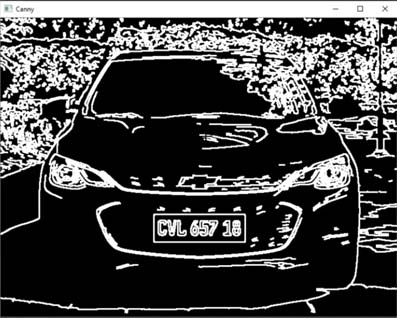

###Encontrar los Contornos
A partir de aquí se procede a encontrar los bordes de Canny que es la imagen en blanco que se ha conseguido desde los pasos anteriores. Esto se logra a través del método `cv2.findCountours(canny, cv2.REST_LIST,cv2.CHAIN_APPROX_SIMPLE)`. Para este código se tiene instalado la versión de OpenCV 4.2, por lo que el método devolverá dos valores, de los cuales el primero corresponderá a los valores del contorno y el que se buscará en la variable. En casos de versiones anteriores, el método devuelve tres valores de los cuales el segundo es el valor del contorno y el que se buscará como variable.<br/>Para dibujar todos los contornos se apela al método `cv2.drawCountours()`. El primer resultado será que se dibujan todos los contornos, pero solamente se necesita el contorno de la placa del automóvil. Para ello se desechar los contornos no deseados. Esto se hace basado en el área con lo cual se busca la forma rectangular de la mátricula.

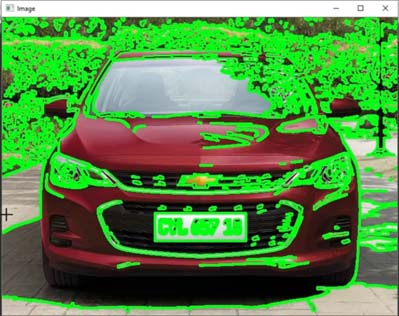

###Determinar el Área del Contorno
Para recorrer cada contorno se utiliza un bucle for. De este modo se va identificando cada tipo de borde. Dentro del bucle for se determina el área del contorno con el método `cv2.countourArea()` <br/> Ahora, y dentro del bucle for, se compara con un condicional a los valores del área con una referencia, por ejemplo 1000, y dentro del condicional el método `cv2.countourArea()`. Es recomendable imprimir en cada momento el valor de área, para tener presente estos valores de referencia.<br/>Como primeros resultados se obtienen varios valores que superan esta referencia y efectivamente rodean a la placa del automóvil, pero también se mantienen presente varios de los otros bordes no deseados. Así también en la consola se observará todos los valores de los bordes que superan los 1000 de referencia.     

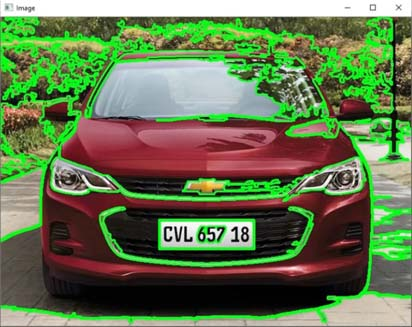

A partir de aquí se puede ir probando con otros valores de referencia como 5000 o más, o quizás menos.<br/>El trabajo está en determinar un área mínima y máxima para que una área sea condiderada una placa de automóvil, lo cual dependerá además de la distancia en que se encuentre la cámara del automóvil -entre otros factores visuales o fotográficos-, pero la distancia es crucial ya que de eso dependerá el tamaño de la placa (más cerca de la cámara será mayor el área, en tanto más alejada de la cámara será un área menor). Incluso se debería aprovechar estos datos para determinar a que distancia está trabajando el código.<br/>


###Detectar la Figura Geométrica
Ahora se buscará precisamente el rectángulo aprovechando el tipo de área geométrica. Para esto se obtiene en una variable los puntos `x` `y` de coordenadas y alto `h` y ancho `w` que rodea a la placa con el método `cv2.boundingRect()` , esto sirve para determinar el "aspect ratio" del contorno y que lo pueda identificar como un rectángulo. Luego hay que obtener `epsilon` que es un parámetro necesario para `cv2.approxPolyDP()` que permite determinar los vértices del contorno. En este último se utilizó el 9% como parámetro (se puede experimentar otros porcentajes). A continuación se modificará el condicional, añadiendo que si el contorno posee cuatro vértices será True. De este modo se obtiene el contorno de la placa del automóvil.<br/>


###Discriminar el Contorno y Determinar el Aspect Ratio del Contorno
Se puede particularizar el código añadiendo el aspect ratio del contorno de la placa, esto es algo muy particular según el país o estado que realice estas placas, o sea que cada país tiene sus propias medidas de placas de automóviles y dichas medidas le darán un aspect ratio particular, incluso no son el mismo aspect ratio las placa de autos particulares de las de taxis. Conocer y añadir el aspect ratio de la placa que se esta buscando le da mayor precisión al código.<br/>
Para calcular el aspect ratio se debe apelar a las siguientes fórmulas:<br/><br/>

$Aspect Ratio= ancho / alto$<br/>
<br/>
Por ejemplo:<br/>
$Aspect Ratio Placa = 404/154$<br/>
$Aspect Ratio Placa = 2,62$<br/>
<br/>
Por lo tanto se podría considerar darle al código un valor de aspect ratio cercano a ese.<br/>El criterio de asignar un aspect ratio al código según las medidas de las placas de automóviles de cada país es opcional, pero es muy recomendable darle un mínimo y un máximo al área que se está buscando, dado que se puede dar el caso de que se presente un área muy ancha o muy larga en que no esté presente la placa buscada. Entonces es necesario delimitar únicamente el rectángulo correspondiente a la placa.<br/>Se identifica en una variable el área donde está presente la mátricula en escala de grises, para ello se utiliza la información de la línea de `epsilon`. Si visualizamos hasta aquí se observará la imagen del auto y otra imagen con la placa del automóvil.

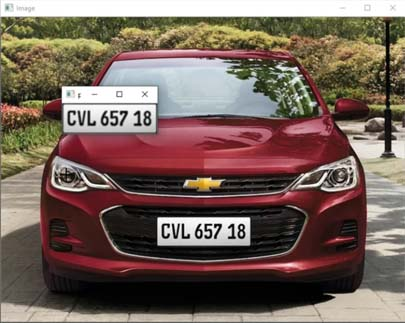

Ahora se va a ponerle a la placa cierta posición para lo cual se emplea el método `cv2.moveWindow()`.<br/>


###Reconocimiento de Caracteres
Como bien ya se ha obtenido la regíon de interés la placa segmentada, se puede aplicar ahora el método de **PyTesseract**. En una variable aplicamos la detección de caracteres `text = pytesseract.image_to_string(placa, config=´--psm 11')` , como primer argumento estará la placa en cuestión, mientras que el segundo argumento corresponde al modo de segmentación de página. De este último vale decir que hay varios modos de segmentación de página con sensibles cambios en los resultados según la modalidad. Dichas modalidades se presentan a continuación.  

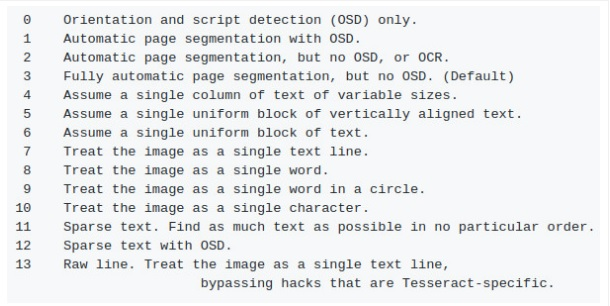

A partir de aquí ya se pueden observar los resultados del trabajo de **PyTesseract**, los cuales se pueden encontrar tanto en la imagen como en la consola como texto y el resultado en número del área cubierta.

##

###Visualización Final
Finalmente se va a visualizar toda la información hasta ahora obtenida en la imagen de entrada. Para encerrar la placa en un rectángulo se utilizará `cv2.rectangle()` y para visualizar los dígitos de la placa `cv2.putText()` .


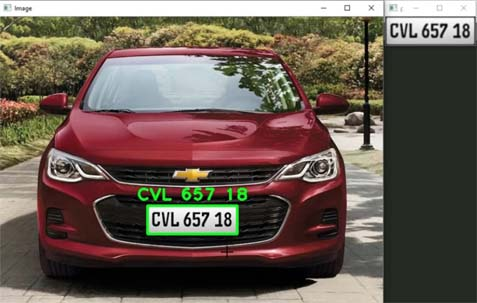

  <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/pycharm/pycharm-original.svg" width="30" height="30" alt="Pycharm logo"  /> Desarrollo del script de Python (entorno virtual)

In [ ]:
#Deteccion de Placas de Automoviles (para Windows)

import cv2
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

placa = []
image = cv2.imread('auto001.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.blur(gray,(3,3))
canny = cv2.Canny(gray,150,200)
canny = cv2.dilate(canny,None,iterations=1)
cnts,_ = cv2.findContours(canny,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(image,cnts,-1,(0,255,0),1)   #Todos los contornos

for c in cnts:
  area = cv2.contourArea(c)
  x,y,w,h = cv2.boundingRect(c)
  epsilon = 0.09 * cv2.arcLength(c,True)
  approx = cv2.approxPolyDP(c,epsilon,True)

  if len(approx)==4 and area > 9000:           #Se experimento a partir de los 5000
    print('area', area)
    #cv2.drawContours(image,[c],0,(0,255,0),2)    #Esta linea ya no es necesaria aqui si se usa el aspect ratio
    aspect_ratio = float(w)/h
    print('aspect_ratio', aspect_ratio)
    if aspect_ratio > 2.4:
      #cv2.drawContours(image,[c],0,(0,255,0),2)  #Esta linea solo sirve para controlar el avance del codigo junto con el aspect ratio
      placa = gray[y:y+h,x:x+w]
      text = pytesseract.image_to_string(placa,config='--psm 11')
      print('text= ',text)
      cv2.imshow('PLACA', placa)
      cv2.moveWindow('PLACA',780,10)
      cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
      cv2.putText(image,text,(x-20,y-10),1,2.2,(0,255,0),3)


cv2.imshow('Image', image)
#cv2.imshow('Canny', canny)
cv2.moveWindows('Image',45,10)
cv2.waitKey(0)

<img src="https://cdn.jsdelivr.net/gh/homarr-labs/dashboard-icons/svg/jupyter.svg" width="30" height="30" alt="Jupyter Notebook"/> Jupyter Notebook: Adaptación del script

In [ ]:
#Deteccion de placas de automoviles con OpenCV en un Jupyter Notebook
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

#Configurar la ruta de Tesseract ajustandola con la ruta segun la instalacion del mismo
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

#imagen de la placa
image = cv2.imread('auto001.png')

if image is None:
    print("Error: No se pudo cargar la imagen 'auto001.png'. Verifica la ruta del archivo.")
    #Crear una imagen de ejemplo si no se puede cargar una imagen real
    image = np.zeros((480, 640, 3), dtype=np.uint8)
    image[:] = [100, 150, 200]
    #Agregar texto de ejemplo en la imagen
    cv2.putText(image, 'ABC123', (100, 200), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)

#Convertir a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#Aplicar blur para suavizar la imagen
gray = cv2.blur(gray, (3, 3))
#Detectar bordes con Canny
canny = cv2.Canny(gray, 150, 200)
#Dilatar los bordes para mejorar la deteccion
canny = cv2.dilate(canny, None, iterations=1)

#Encontrar contornos
cnts, _ = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

#Dibujar contornos y detectar placas
image_result = image.copy()
placa_detectada = None
text_placa = ""

for c in cnts:
    area = cv2.contourArea(c)
    x, y, w, h = cv2.boundingRect(c)
    epsilon = 0.09 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, epsilon, True)

    if len(approx) == 4 and area > 9000:
        print('area:', area)
        aspect_ratio = float(w) / h
        print('aspect_ratio:', aspect_ratio)
        if aspect_ratio > 2.4:
            #Extraer la region de la placa
            placa = gray[y:y+h, x:x+w]
            #Extraer texto de la placa
            text = pytesseract.image_to_string(placa, config='--psm 11')
            print('text =', text)
            #Dibujar rectangulo alrededor de la placa
            cv2.rectangle(image_result, (x, y), (x + w, y + h), (0, 255, 0), 3)
            cv2.putText(image_result, text, (x - 20, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 3)
            placa_detectada = placa
            text_placa = text

#Mostrar las imagenes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(image_result, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'Imagen con Placa Detectada\nTexto: {text_placa}')
axes[1].axis('off')

plt.tight_layout()
plt.show()

#Mostrar la placa detectada si se encontro
if placa_detectada is not None:
    plt.figure(figsize=(6, 4))
    plt.title(f'Placa Detectada\nTexto: {text_placa}')
    plt.imshow(placa_detectada, cmap='gray')
    plt.axis('off')
    plt.show()

print(f'Texto de la placa detectada: {text_placa}')

En primer lugar hay que asegurarse de tener instalado **Tesseract OCR** en el sistema y de que la ruta en `pytesseract.pytesseract.tesseract_cmd` sea correcta.<br/>
También se debe revisar de que la imagen auto001.png esté en el directorio correcto.<br/>
Para utilizar el script en un contexto de **Jupyter** las funciones `cv2.moveWindow()` y `cv2.moveWindows()` no se utilizan.
Entonces el script de **Python** funcionará muy bien en un **Jupyter**, el cual detecta las placas de automóviles y extrae el texto de ellas. El resultado muestra la imagen original y la imagen con la placa detectada.


[Más Información sobre **Detección de Placas de Automóviles en OMES**](https://omes-va.com/reconocimiento-de-matriculas-vehiculares-opencv-pytesseract-ocr-python/)

[PYTESSERACT](https://pypi.org/project/pytesseract/)

[MANUAL DE USUARIO TESSERACT-OCR](https://github.com/tesseract-ocr/tessdoc)

[Visita el Blog de OMES](https://omes-va.com/deteccion-de-rostros-con-haar-cascades-python-opencv/)

